In [1]:
#imports
import math
import random
import pandas as pd
import numpy as np
import os
import networkx as nx
import matplotlib.pyplot as plt
import collections
from operator import itemgetter
import geopandas
from matplotlib.colors import ListedColormap

## Data importing and preprocessing

In [2]:
# listing the Excels Files

excel_list1 = os.listdir("Raw_Data")
excel_list = []
for i in excel_list1:
    if(i.endswith(".csv")):
        excel_list.append(i)   
excel_list.sort()

## Directed Weighted Network Creation

In [3]:
# Creating networks and stroing them
coordinates = pd.read_csv("Raw_Data/coordinates/sorted_coordinates.csv",header=0,index_col= 0)
print(coordinates)

max_weight = 0
min_weight = 10000000000

graphs = []
passengers = []   # records number of total passengers(month wise)
lbls = []
for i in excel_list:
    path = "Raw_Data/"+i
    excel = pd.read_csv(path ,header=0, index_col=0, usecols = [0,1,2,3,4] ,names=["SNo","city1","city2","to","from"] )
    passengers.append(sum(excel["to"]) + sum(excel["from"]))
    lbls.append(i[:-4])
    G = nx.DiGraph()
    cities = {}
    for i in range(1,len(excel)+1):
        cities[excel["city1"][i]] = (coordinates["Longitude"][excel["city1"][i]],coordinates["Latitude"][excel["city1"][i]])
        cities[excel["city2"][i]] = (coordinates["Longitude"][excel["city2"][i]],coordinates["Latitude"][excel["city2"][i]])
    for i in cities:
        G.add_node(i, pos= cities[i])
    
    print(path)
    for i in range(1,len(excel)+1):
        weight1 = excel["to"][i]
        if(weight1 != 0):
            G.add_edge(excel["city1"][i],excel["city2"][i],weight=weight1)
        weight2 = excel["from"][i]
        if(weight2 != 0):
            G.add_edge(excel["city2"][i],excel["city1"][i],weight=weight2)
        
        max_weight = max(max_weight, weight1, weight2)
        min_weight = min(min_weight, weight1, weight2)
    graphs.append(G)
nx.write_gml(graphs[-7], "test.gml", stringizer = str)
#print(cities)

               Latitude  Longitude
Cities                            
ADAMPUR          31.430     75.750
AGARTALA         23.887     91.240
AGATTI ISLAND    10.824     72.176
AGRA             27.156     77.961
AHMEDABAD        23.077     72.635
...                 ...        ...
VADODARA         22.336     73.226
VARANASI         25.452     82.859
VIDYANAGAR       15.170     76.620
VIJAYAWADA       16.530     80.797
VISAKHAPATNAM    17.721     83.224

[119 rows x 2 columns]
Raw_Data/1505.csv
Raw_Data/1506.csv
Raw_Data/1507.csv
Raw_Data/1508.csv
Raw_Data/1509.csv
Raw_Data/1510.csv
Raw_Data/1511.csv
Raw_Data/1512.csv
Raw_Data/1601.csv
Raw_Data/1602.csv
Raw_Data/1603.csv
Raw_Data/1604.csv
Raw_Data/1605.csv
Raw_Data/1606.csv
Raw_Data/1607.csv
Raw_Data/1608.csv
Raw_Data/1609.csv
Raw_Data/1610.csv
Raw_Data/1611.csv
Raw_Data/1612.csv
Raw_Data/1701.csv
Raw_Data/1702.csv
Raw_Data/1703.csv
Raw_Data/1704.csv
Raw_Data/1705.csv
Raw_Data/1706.csv
Raw_Data/1707.csv
Raw_Data/1708.csv
Raw_Data/1709.csv

In [4]:
lbls1 = []
month = {"01":"Jan", "02":"Feb", "03":"March", "04":"April", "05":"May", "06":"June", "07":"July", "08":"Aug", 
        "09":"Sep", "10":"Oct", "11":"Nov", "12":"Dec"}
for e in lbls:
    lbls1.append(month[e[2:]]+e[:2])

In [5]:
# coordinates has city, lat, long -> <class 'pandas.core.frame.DataFrame'>

df = geopandas.read_file("shapefile/india_states.shp")


In [6]:
print(df)

               ST_NM  ST_ID  ID  \
0    Jammu & Kashmir  IN-JK  JK   
1            Gujarat  IN-GJ  GJ   
2            Gujarat  IN-GJ  GJ   
3            Gujarat  IN-GJ  GJ   
4            Gujarat  IN-GJ  GJ   
..               ...    ...  ..   
266           Odisha  IN-OR  OR   
267        Jharkhand  IN-JH  JH   
268     NCT of Delhi  IN-DL  DL   
269        Telangana  IN-TG  TG   
270       Puducherry  IN-PY  PY   

                                              geometry  
0    MULTIPOLYGON (((75.88864 32.57603, 75.84635 32...  
1    POLYGON ((72.67653 21.15570, 72.70319 21.14625...  
2    POLYGON ((72.35319 21.61347, 72.36291 21.60069...  
3    POLYGON ((72.72264 21.66597, 72.74597 21.65875...  
4    POLYGON ((72.27431 21.74958, 72.28264 21.73458...  
..                                                 ...  
266  POLYGON ((87.49020 21.60265, 87.47440 21.59988...  
267  POLYGON ((83.50607 24.52589, 83.55031 24.52505...  
268  POLYGON ((77.34765 28.50346, 77.31673 28.48519...  
269  POLY

In [7]:
colors = ['#fafa6e','#72cf85', '#00ffff','#00968e', '#1b6474','#9966ff','#ff66cc','#993366',
          '#ff5050','#ff3300','#cc3300','#993300','#800000',]


for i in range(len(lbls)):
    print(i)
    df.boundary.plot()

    #cmap = ListedColormap(['#fafa6e', '#e1f470','#c9ee73', '#b2e777', '#9cdf7c', '#86d780', '#72cf85', '#5ec688', '#4abd8c', '#37b38e',
    #     '#23aa8f', '#0ba08f', '#00968e', '#008c8b', '#008288', '#007882', '#106e7c', '#1b6474', '#225b6c', '#275162',
    #     '#2a4858'])
    cmap = ListedColormap(colors)
    
    

    try:
        edges, weights = zip(*nx.get_edge_attributes(graphs[i],'weight').items())
        nx.draw(graphs[i], nx.get_node_attributes(graphs[i],'pos'),node_size = 50, node_color='b', edgelist=edges, 
            edge_color=weights, width=1.0, edge_cmap=cmap, vmin=min_weight, vmax=max_weight, fontsize=100,labelsize=50,weight='bold')
    except:
        #print("HAHAHA")
        nx.draw_networkx(graphs[i],nx.get_node_attributes(graphs[i],'pos'),font_color = "red")
    
    

#     figure.set_size_inches(100, 100)
    
    
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin = min_weight, vmax=max_weight))
    sm._A = []
    cb = plt.colorbar(sm)
    cb.ax.tick_params(labelsize=15) 
    cb.set_label(label='Number of Passengers',weight='bold',size = 20)

    


    plt.title("Airport Network Of India "+ lbls1[i])
    
    figure = plt.gcf()
    figure.set_size_inches(30, 30)
    
    plt.savefig('Output_Files/matplotlib/map/'+lbls[i])
    #plt.savefig(lbls[i])
 
    #plt.show()
    plt.clf()


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


/home/yashraj/.local/lib/python3.8/site-packages/geopandas/plotting.py:358: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65


<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

## Network Visualization

['1505', '1506', '1507', '1508', '1509', '1510', '1511', '1512', '1601', '1602', '1603', '1604', '1605', '1606', '1607', '1608', '1609', '1610', '1611', '1612', '1701', '1702', '1703', '1704', '1705', '1706', '1707', '1708', '1709', '1710', '1711', '1712', '1801', '1802', '1803', '1804', '1805', '1806', '1807', '1808', '1809', '1810', '1811', '1812', '1901', '1902', '1903', '1904', '1905', '1906', '1907', '1908', '1909', '1910', '1911', '1912', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010']


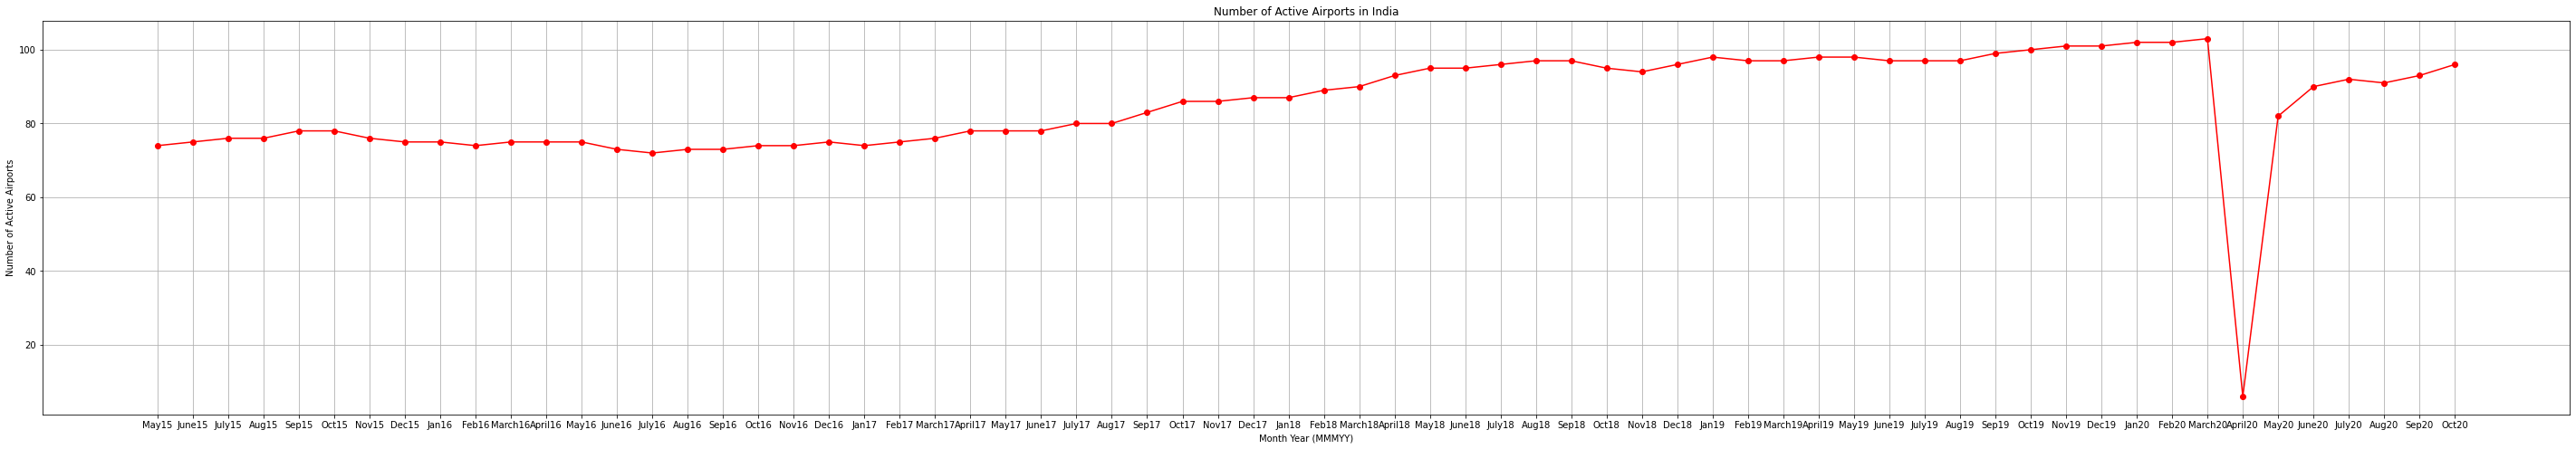

In [8]:
nodes = []
for i in range(len(graphs)):
    nodes.append(len(graphs[i].nodes()))
print(lbls)
plt.plot(nodes, color="red", marker="o")
plt.xlabel("Month Year (MMMYY)")

plt.xticks([i for i in range(66)], labels = lbls1)
plt.ylabel("Number of Active Airports")
plt.title("Number of Active Airports in India")
plt.grid(True)

figure = plt.gcf()
figure.set_size_inches(50, 8)
plt.savefig('Output_Files/matplotlib/nodes')
plt.show()

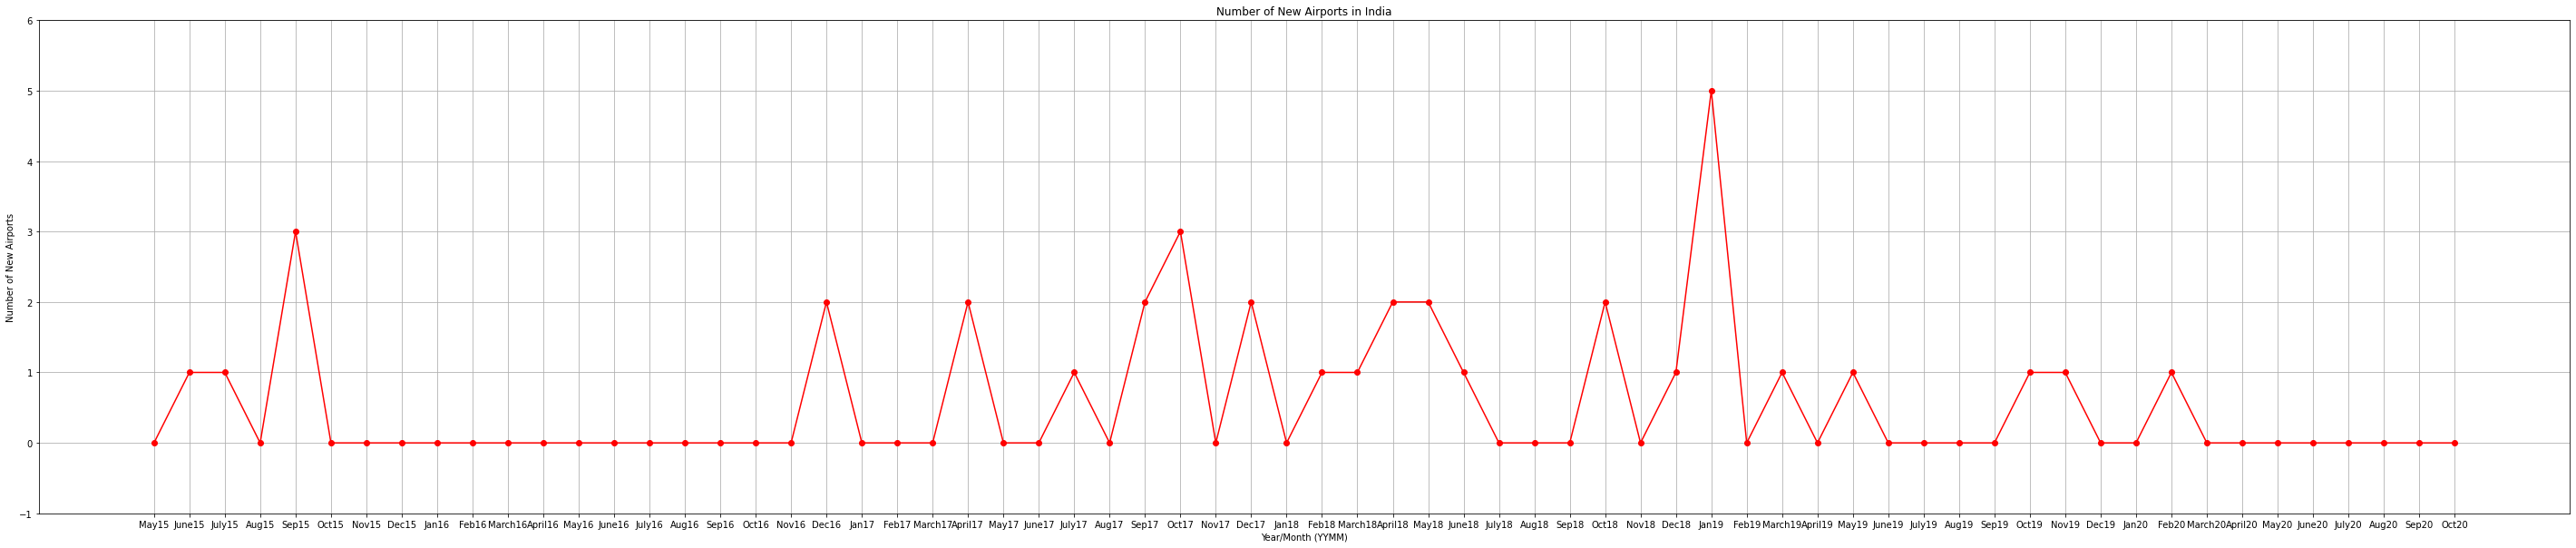

In [9]:
nnodes = []
airpor = {} 
for i in range(len(graphs)):
    temp = 0
    for j in graphs[i].nodes():
        if j not in airpor:
            airpor[j]=  1
            temp += 1
    nnodes.append(temp)
nnodes[0] = 0
plt.plot(nnodes, color="red", marker="o")
plt.xlabel("Year/Month (YYMM)")
plt.xticks([i for i in range(66)], labels = lbls1)
plt.ylabel("Number of New Airports")
plt.title("Number of New Airports in India")
plt.grid(True)
plt.ylim(-1,6)
figure = plt.gcf()
figure.set_size_inches(50, 10)
plt.savefig('Output_Files/matplotlib/newnodes')
plt.show()

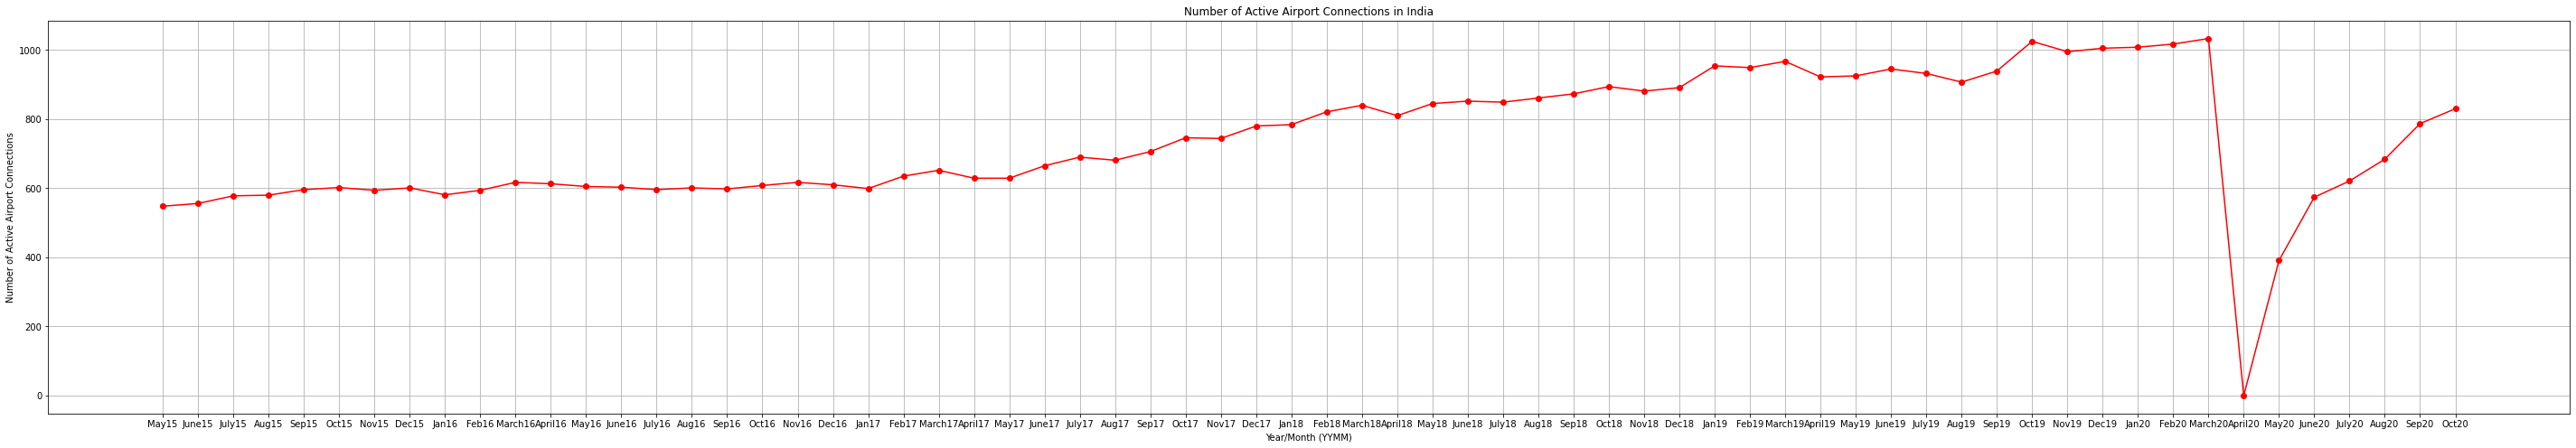

In [10]:
edges = []
for i in range(len(graphs)):
    edges.append(len(graphs[i].edges()))
plt.plot(edges, color="red", marker="o")
plt.xlabel("Year/Month (YYMM)")
plt.xticks([i for i in range(66)], labels = lbls1)
plt.ylabel("Number of Active Airport Connections")
plt.title("Number of Active Airport Connections in India")
plt.grid(True)
figure = plt.gcf()
figure.set_size_inches(50, 8)
plt.savefig('Output_Files/matplotlib/edges')
plt.show()

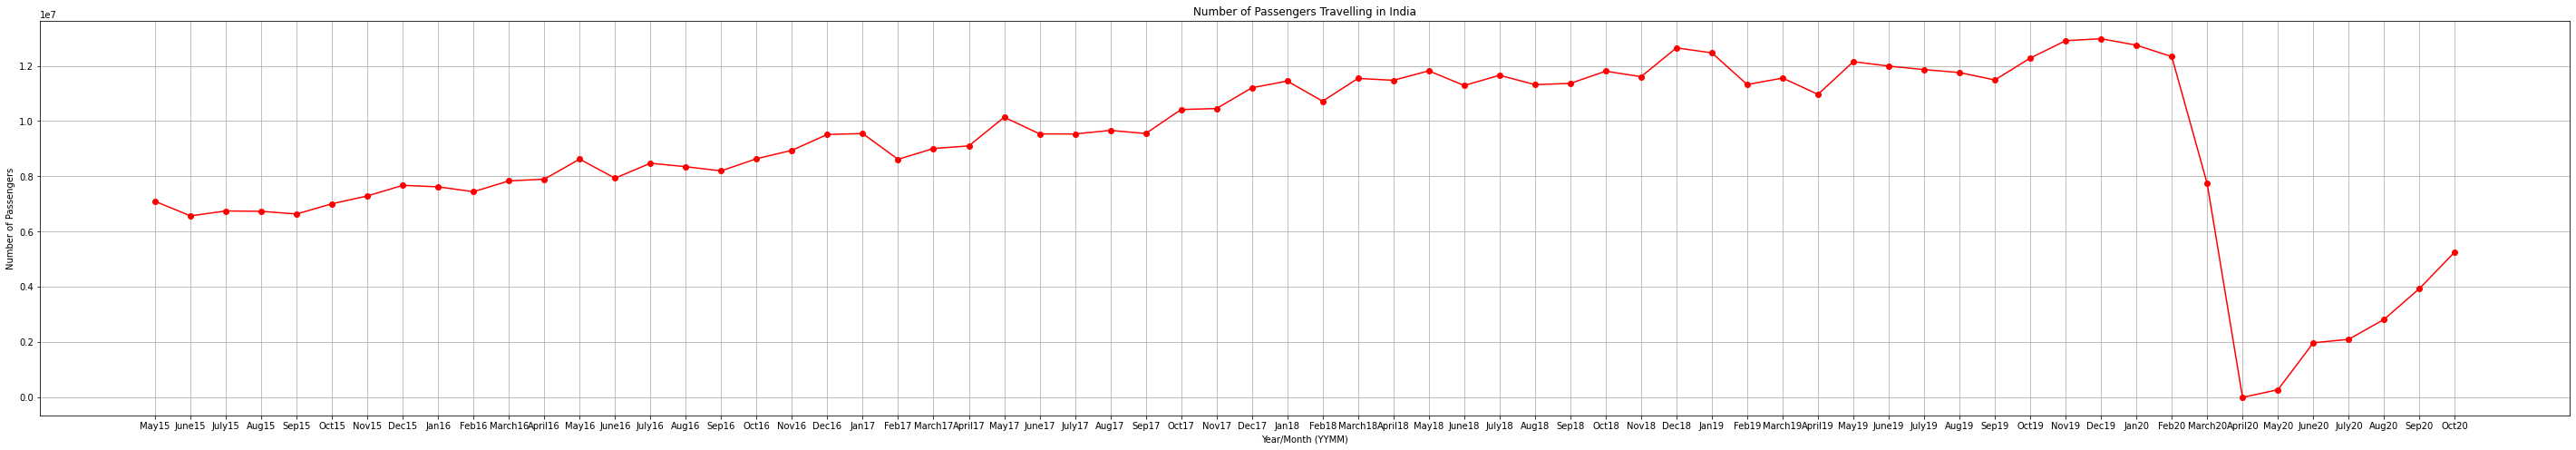

In [11]:
plt.plot(passengers, color="red",  marker="o")
plt.xlabel("Year/Month (YYMM)")
plt.xticks([i for i in range(66)],labels = lbls1)
plt.ylabel("Number of Passengers")
plt.title("Number of Passengers Travelling in India")
plt.grid(True)
figure = plt.gcf()
figure.set_size_inches(50, 8)
plt.savefig('Output_Files/matplotlib/passengers')
plt.show()

In [12]:
for i in sorted(airpor.keys()):
    print(i)

ADAMPUR
AGARTALA
AGATTI ISLAND
AGRA
AHMEDABAD
AIZAWL
AJMER
ALLAHABAD
AMRITSAR
AURANGABAD
BAGDOGRA
BELGAUM
BENGALURU
BHATINDA
BHAVNAGAR
BHOPAL
BHUBANESWAR
BHUJ
BIDAR AIRPORT, KARNATAKA
BIKANER
CHANDIGARH
CHENNAI
COCHIN
COIMBATORE
CUDDAPAH
DABOLIM
DEHRA DUN
DELHI
DHARAMSALA
DIBRUGARH
DIMAPUR
DIU
DURGAPUR
GANGTOK
GAYA
GHAZIABAD
GOA
GORAKHPUR
GUWAHATI
GWALIOR
HUBLI
HYDERABAD
IMPHAL
INDORE
JABALPUR
JAGDALPUR
JAIPUR
JAISALMER
JALGAON
JAMMU
JAMNAGAR
JHARSUGUDA
JODHPUR
JORHAT
Jharsuguda
KADAPA
KALABURAGI, KARNATAKA
KANDLA
KANNUR
KANPUR
KHAJURAHO
KOCHI
KOLHAPUR
KOLKATA
KOZHIKODE
KULLU
LEH
LILABARI
LUCKNOW
LUDHIANA
MADURAI
MANGALORE
MUMBAI
MUNDRA
MYSORE
NAGPUR
NANDED
NASIK
PAKYONG
PANTNAGAR
PASIGHAT
PATHANKOT
PATNA
PITHORAGARH
PONDICHERRY
PORBANDAR
PORT BLAIR
PUDUCHERRY
PUNE
RAIPUR
RAJAHMUNDRY
RAJKOT
RANCHI
SALEM
SHILLONG
SHIRDI
SILCHAR
SIMLA
SRINAGAR
SURAT
TEZPUR
TIRUCHIRAPALLY
TIRUPATI
TRIVANDRUM
TUTICORIN
UDAIPUR
VADODARA
VARANASI
VIDYANAGAR
VIJAYAWADA
VISAKHAPATNAM


excel = pd.read_csv("Raw_Data/coordinates/sorted_coordinates.csv",header=0)
tempcity = list(excel["Cities"])
#print(tempcity)
for i in sorted(airpor.keys()):
    if i not in tempcity:
        print(i)

In [13]:
for i in range(len(graphs)):
    print(lbls1[i])
    G = graphs[i]
    betweenness_dict = nx.betweenness_centrality(G)
    nx.set_node_attributes(G, betweenness_dict, 'betweenness')
    
    sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)

#     sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)

    print("Top 10 nodes")
    
    for i in range(len(sorted_betweenness[:10])):
        print(sorted_betweenness[i][0] + " -> " + str(sorted_betweenness[i][1]))


May15
Top 10 nodes
DELHI -> 0.35088642067808723
MUMBAI -> 0.2462499554394531
KOLKATA -> 0.14229527765486671
BENGALURU -> 0.12847787254179963
CHENNAI -> 0.09071295217128547
GUWAHATI -> 0.06162531447919573
HYDERABAD -> 0.04865761880602063
KOCHI -> 0.0279885766187136
SILCHAR -> 0.0273972602739726
AHMEDABAD -> 0.00892063262925135
June15
Top 10 nodes
DELHI -> 0.347284328962411
MUMBAI -> 0.240014704227033
BENGALURU -> 0.15818270955257266
KOLKATA -> 0.13654468757208485
CHENNAI -> 0.08676250833785078
GUWAHATI -> 0.06227147168927988
HYDERABAD -> 0.04598120625517885
KOCHI -> 0.02760236184893719
SILCHAR -> 0.02702702702702703
AHMEDABAD -> 0.008529895687429935
July15
Top 10 nodes
DELHI -> 0.33858513183513167
MUMBAI -> 0.22533362558362557
BENGALURU -> 0.16823499273499282
KOLKATA -> 0.13308620958620956
CHENNAI -> 0.08914823564823564
GUWAHATI -> 0.061061578061578047
HYDERABAD -> 0.04735814210814211
KOCHI -> 0.028210214210214208
SILCHAR -> 0.02666666666666667
VARANASI -> 0.018153796653796652
Aug15
Top

Top 10 nodes
DELHI -> 0.3697375078797266
MUMBAI -> 0.21348019672200608
HYDERABAD -> 0.12218419387071655
BENGALURU -> 0.09682385142642033
KOLKATA -> 0.09048686707379924
CHENNAI -> 0.07130890244721222
GUWAHATI -> 0.0632748580533391
KOCHI -> 0.026196109191269273
INDORE -> 0.014212364054136204
KHAJURAHO -> 0.012658227848101266
Sep17
Top 10 nodes
DELHI -> 0.3881526211365036
MUMBAI -> 0.2008639387258699
HYDERABAD -> 0.11703813475493695
BENGALURU -> 0.09193585468962266
KOLKATA -> 0.0904179609137295
CHENNAI -> 0.09005681034813828
GUWAHATI -> 0.061537629947985124
KOCHI -> 0.025339475757271593
KHAJURAHO -> 0.012195121951219513
VARANASI -> 0.00714978754725819
Oct17
Top 10 nodes
DELHI -> 0.3868535798157648
MUMBAI -> 0.19500025010003996
HYDERABAD -> 0.1447209396579144
CHENNAI -> 0.09832419156473775
KOLKATA -> 0.08197666362582326
BENGALURU -> 0.06409792743826358
GUWAHATI -> 0.05872495482264389
KOCHI -> 0.02480314853214012
JAIPUR -> 0.011932166806116383
KHAJURAHO -> 0.011764705882352941
Nov17
Top 10 

Top 10 nodes
DELHI -> 0.3004775012986095
MUMBAI -> 0.18929624412259105
BENGALURU -> 0.12626545663891467
KOLKATA -> 0.12230759410048259
HYDERABAD -> 0.1082019677469551
CHENNAI -> 0.06773797987265164
AHMEDABAD -> 0.041482085114725
GUWAHATI -> 0.024971958102566034
DEHRA DUN -> 0.02337535268751846
JAIPUR -> 0.023120821986997518
Dec19
Top 10 nodes
DELHI -> 0.29510150045322
MUMBAI -> 0.18616953327197938
BENGALURU -> 0.1269805307370882
KOLKATA -> 0.11702156327469851
HYDERABAD -> 0.10889042522381517
CHENNAI -> 0.06839940235293383
AHMEDABAD -> 0.04854809431376554
GUWAHATI -> 0.03043069431189349
JAIPUR -> 0.025278222821463976
DEHRA DUN -> 0.023356598806004627
Jan20
Top 10 nodes
DELHI -> 0.29760778777877034
MUMBAI -> 0.16986625176670753
BENGALURU -> 0.12167532491877861
HYDERABAD -> 0.10899352729986823
KOLKATA -> 0.09063959353321241
AHMEDABAD -> 0.0829694873052305
CHENNAI -> 0.0747925616293193
GUWAHATI -> 0.05682827189373237
DEHRA DUN -> 0.022874612855597127
JAIPUR -> 0.022685307897305558
Feb20
To

Degree Distribution

In [34]:
for i in range(len(graphs)):
    print(lbls1[i])
    G = graphs[i]
    degree_dict = dict(G.degree(G.nodes()))
    nx.set_node_attributes(G, degree_dict, 'degree')

    sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)
    #print(sorted_degree)

    print("Top 10 nodes")
    for z in range(len(sorted_degree[:10])):
        print(sorted_degree[z][0] + " -> " + str(sorted_degree[z][1]))
    
    
    plt.figure(figsize = (125, 10))
    plt.plot( [y[1] for y in sorted_degree], color="red",  marker="o")
    plt.title("Degree distribution for " + lbls1[i])
    plt.xticks([i for i in range(len(sorted_degree))],labels =[x[0][:10] for x in sorted_degree] )
    plt.grid(True)
    
    #plt.tick_params(axis="both", which="major")
    plt.savefig('Output_Files/matplotlib/Degree/ ' + lbls1[i])
    #plt.show()
    plt.clf()

    print("\n")
    
    
    # TODO: add city labels
    
    
    

May15
Top 10 nodes
DELHI -> 107
MUMBAI -> 92
BENGALURU -> 76
KOLKATA -> 66
CHENNAI -> 60
HYDERABAD -> 54
AHMEDABAD -> 35
GUWAHATI -> 32
INDORE -> 27
PUNE -> 27


June15
Top 10 nodes
DELHI -> 107
MUMBAI -> 92
BENGALURU -> 80
KOLKATA -> 65
CHENNAI -> 60
HYDERABAD -> 54
AHMEDABAD -> 35
GUWAHATI -> 34
INDORE -> 28
GOA -> 27


July15
Top 10 nodes
DELHI -> 107
MUMBAI -> 92
BENGALURU -> 85
KOLKATA -> 65
CHENNAI -> 62
HYDERABAD -> 61
GUWAHATI -> 34
AHMEDABAD -> 33
INDORE -> 28
PUNE -> 27


Aug15
Top 10 nodes
DELHI -> 108
MUMBAI -> 92
BENGALURU -> 85
KOLKATA -> 66
HYDERABAD -> 61
CHENNAI -> 60
GUWAHATI -> 34
AHMEDABAD -> 33
INDORE -> 28
PUNE -> 28


Sep15
Top 10 nodes
DELHI -> 110
MUMBAI -> 95
BENGALURU -> 89
KOLKATA -> 73
HYDERABAD -> 61
CHENNAI -> 60
GUWAHATI -> 34
AHMEDABAD -> 33
GOA -> 29
INDORE -> 28


Oct15
Top 10 nodes
DELHI -> 112
MUMBAI -> 94
BENGALURU -> 87
KOLKATA -> 72
CHENNAI -> 62
HYDERABAD -> 61
AHMEDABAD -> 37
GUWAHATI -> 34
PUNE -> 30
GOA -> 28


Nov15
Top 10 nodes
DELHI -> 111

<ipython-input-34-32a03f88a51c>:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (125, 10))




Feb17
Top 10 nodes
DELHI -> 119
MUMBAI -> 94
BENGALURU -> 83
KOLKATA -> 72
HYDERABAD -> 67
CHENNAI -> 62
GUWAHATI -> 41
PUNE -> 34
AHMEDABAD -> 33
GOA -> 30


March17
Top 10 nodes
DELHI -> 121
MUMBAI -> 94
BENGALURU -> 82
KOLKATA -> 74
HYDERABAD -> 67
CHENNAI -> 61
GUWAHATI -> 41
AHMEDABAD -> 36
GOA -> 34
PUNE -> 34


April17
Top 10 nodes
DELHI -> 120
MUMBAI -> 91
BENGALURU -> 77
KOLKATA -> 76
HYDERABAD -> 69
CHENNAI -> 61
GUWAHATI -> 39
AHMEDABAD -> 36
PUNE -> 31
JAIPUR -> 30


May17
Top 10 nodes
DELHI -> 120
MUMBAI -> 93
BENGALURU -> 82
KOLKATA -> 76
HYDERABAD -> 70
CHENNAI -> 60
GUWAHATI -> 39
AHMEDABAD -> 35
PUNE -> 31
GOA -> 27


June17
Top 10 nodes
DELHI -> 122
MUMBAI -> 91
BENGALURU -> 84
HYDERABAD -> 75
KOLKATA -> 75
CHENNAI -> 62
GUWAHATI -> 40
AHMEDABAD -> 38
PUNE -> 34
GOA -> 33


July17
Top 10 nodes
DELHI -> 122
MUMBAI -> 97
BENGALURU -> 80
HYDERABAD -> 75
KOLKATA -> 74
CHENNAI -> 63
GUWAHATI -> 40
AHMEDABAD -> 38
JAIPUR -> 35
GOA -> 34


Aug17
Top 10 nodes
DELHI -> 119
M

<Figure size 9000x720 with 0 Axes>

<Figure size 9000x720 with 0 Axes>

<Figure size 9000x720 with 0 Axes>

<Figure size 9000x720 with 0 Axes>

<Figure size 9000x720 with 0 Axes>

<Figure size 9000x720 with 0 Axes>

<Figure size 9000x720 with 0 Axes>

<Figure size 9000x720 with 0 Axes>

<Figure size 9000x720 with 0 Axes>

<Figure size 9000x720 with 0 Axes>

<Figure size 9000x720 with 0 Axes>

<Figure size 9000x720 with 0 Axes>

<Figure size 9000x720 with 0 Axes>

<Figure size 9000x720 with 0 Axes>

<Figure size 9000x720 with 0 Axes>

<Figure size 9000x720 with 0 Axes>

<Figure size 9000x720 with 0 Axes>

<Figure size 9000x720 with 0 Axes>

<Figure size 9000x720 with 0 Axes>

<Figure size 9000x720 with 0 Axes>

<Figure size 9000x720 with 0 Axes>

<Figure size 9000x720 with 0 Axes>

<Figure size 9000x720 with 0 Axes>

<Figure size 9000x720 with 0 Axes>

<Figure size 9000x720 with 0 Axes>

<Figure size 9000x720 with 0 Axes>

<Figure size 9000x720 with 0 Axes>

<Figure size 9000x720 with 0 Axes>

<Figure size 9000x720 with 0 Axes>

<Figure size 9000x720 with 0 Axes>

<Figure size 9000x720 with 0 Axes>

<Figure size 9000x720 with 0 Axes>

<Figure size 9000x720 with 0 Axes>

<Figure size 9000x720 with 0 Axes>

<Figure size 9000x720 with 0 Axes>

<Figure size 9000x720 with 0 Axes>

<Figure size 9000x720 with 0 Axes>

<Figure size 9000x720 with 0 Axes>

<Figure size 9000x720 with 0 Axes>

<Figure size 9000x720 with 0 Axes>

<Figure size 9000x720 with 0 Axes>

<Figure size 9000x720 with 0 Axes>

<Figure size 9000x720 with 0 Axes>

<Figure size 9000x720 with 0 Axes>

<Figure size 9000x720 with 0 Axes>

<Figure size 9000x720 with 0 Axes>

<Figure size 9000x720 with 0 Axes>

<Figure size 9000x720 with 0 Axes>

<Figure size 9000x720 with 0 Axes>

<Figure size 9000x720 with 0 Axes>

<Figure size 9000x720 with 0 Axes>

<Figure size 9000x720 with 0 Axes>

<Figure size 9000x720 with 0 Axes>

<Figure size 9000x720 with 0 Axes>

<Figure size 9000x720 with 0 Axes>

<Figure size 9000x720 with 0 Axes>

<Figure size 9000x720 with 0 Axes>

<Figure size 9000x720 with 0 Axes>

<Figure size 9000x720 with 0 Axes>

<Figure size 9000x720 with 0 Axes>

<Figure size 9000x720 with 0 Axes>

<Figure size 9000x720 with 0 Axes>

<Figure size 9000x720 with 0 Axes>

<Figure size 9000x720 with 0 Axes>

<Figure size 9000x720 with 0 Axes>

<Figure size 9000x720 with 0 Axes>

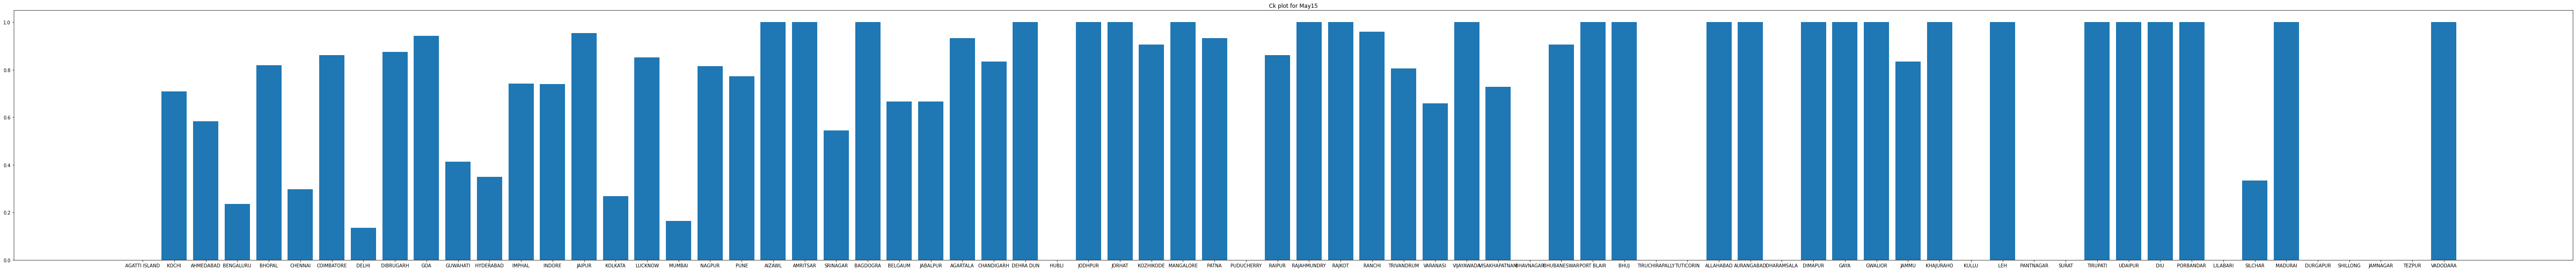

Average clustering coefficient for May15 is 0.6498709231340716


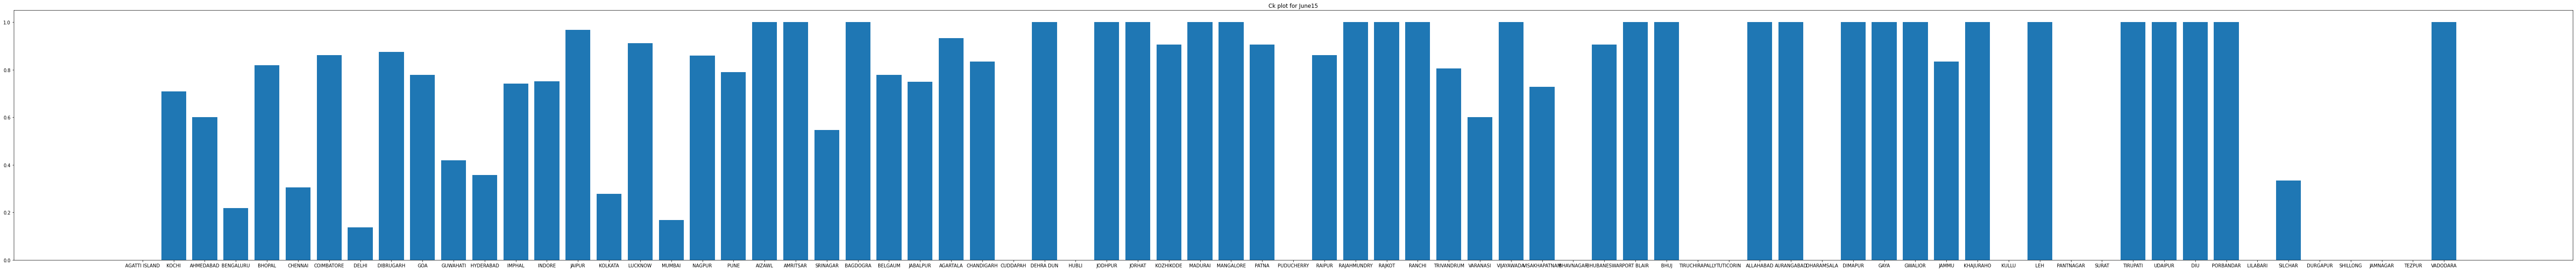

Average clustering coefficient for June15 is 0.6434613629926142


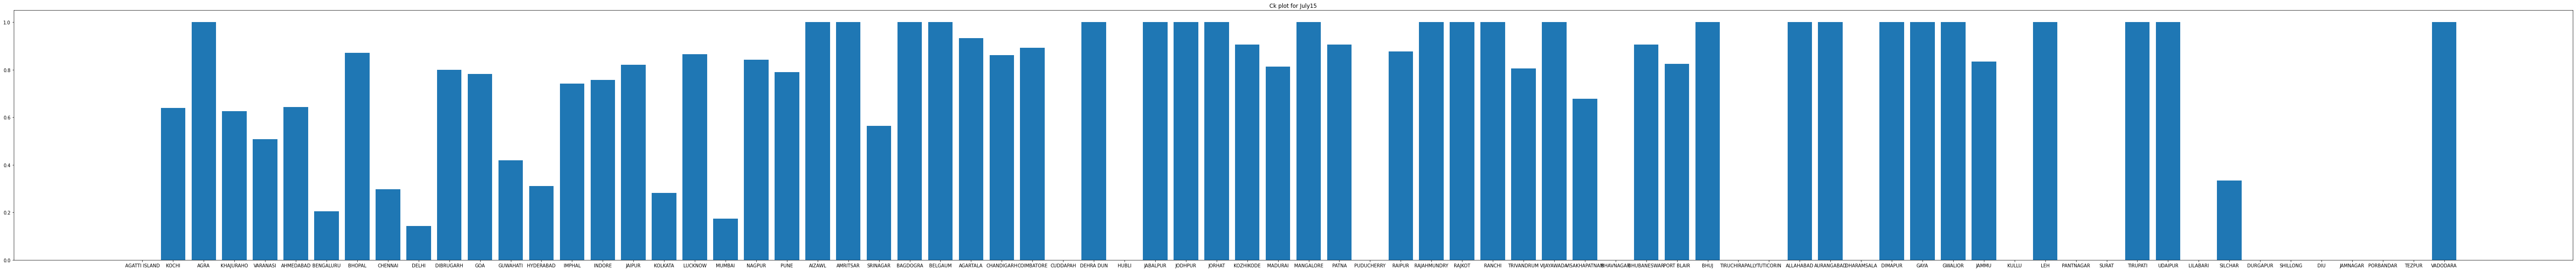

Average clustering coefficient for July15 is 0.6136858940651846


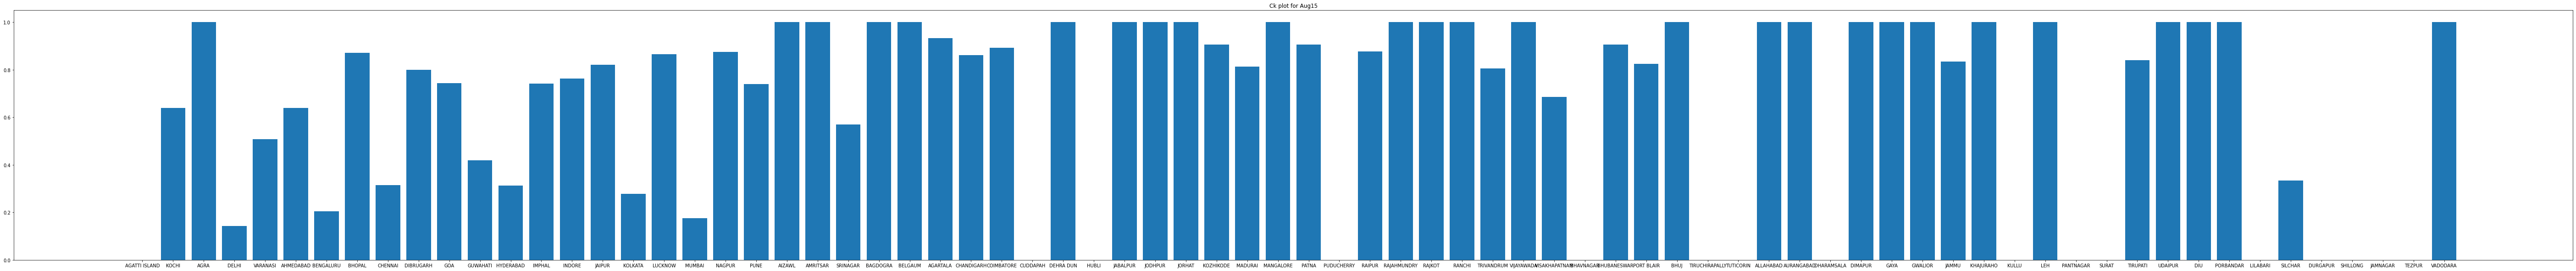

Average clustering coefficient for Aug15 is 0.6425104965289116


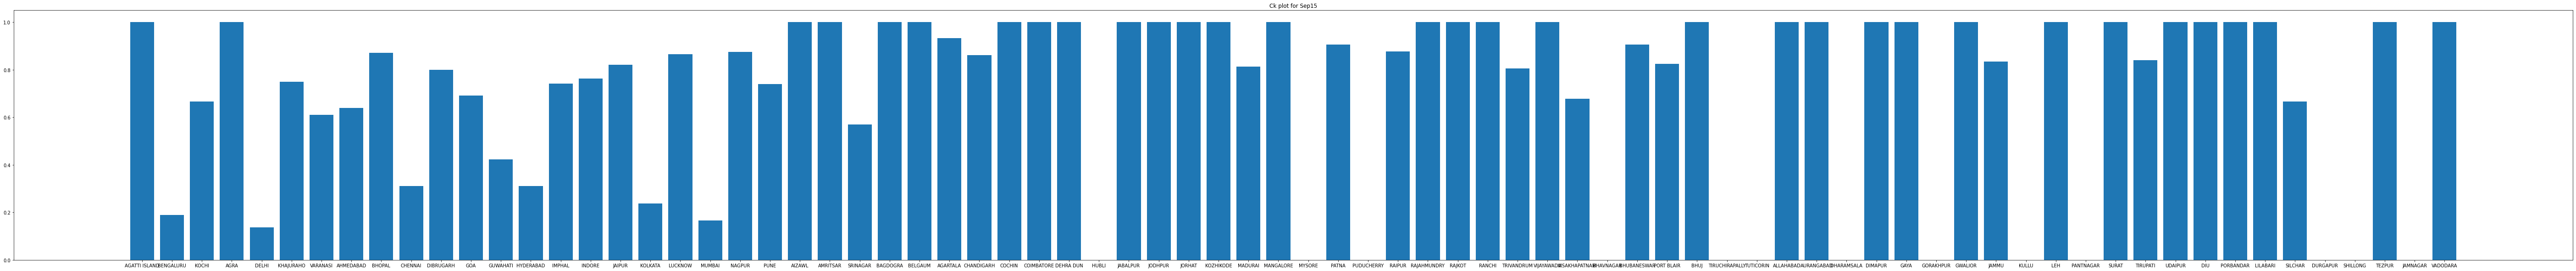

Average clustering coefficient for Sep15 is 0.6937912813593201


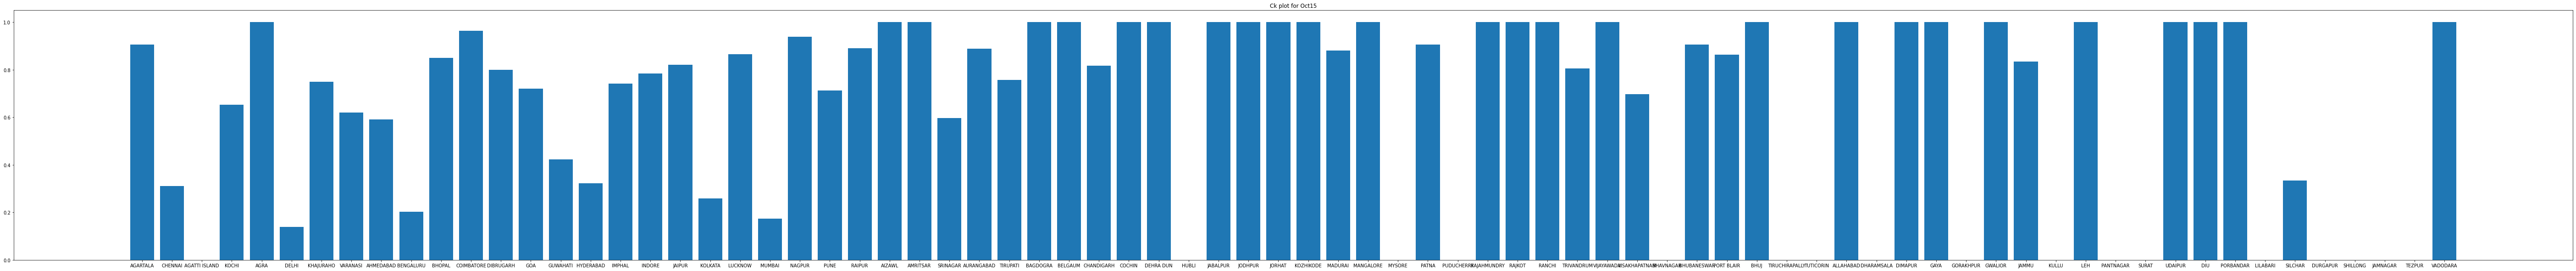

Average clustering coefficient for Oct15 is 0.6373241272214337


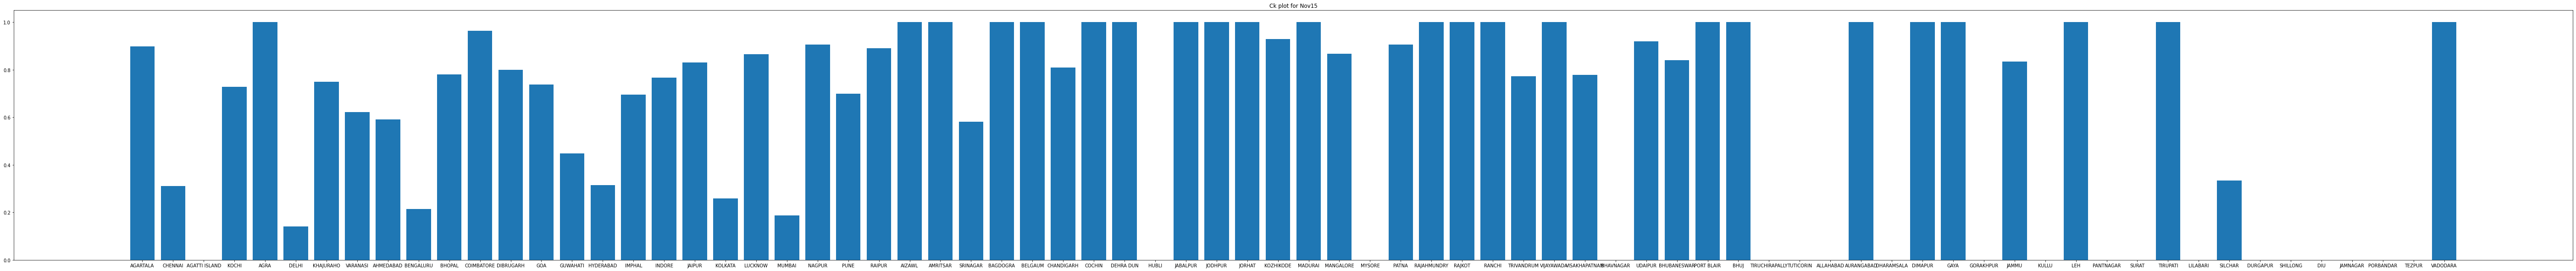

Average clustering coefficient for Nov15 is 0.6046984457370973


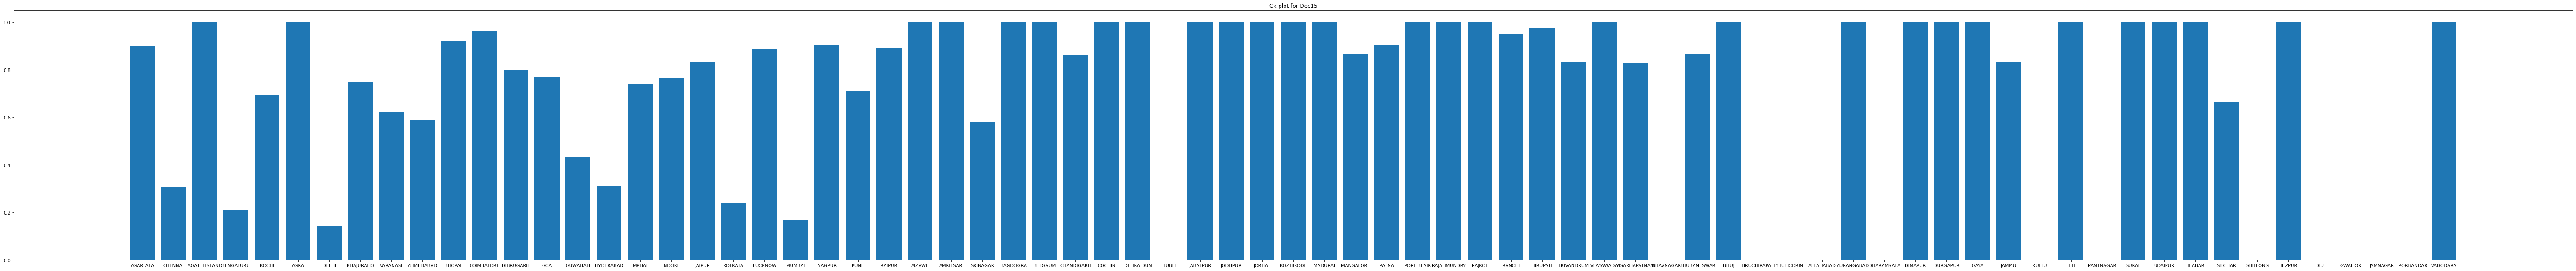

Average clustering coefficient for Dec15 is 0.6894202575685523


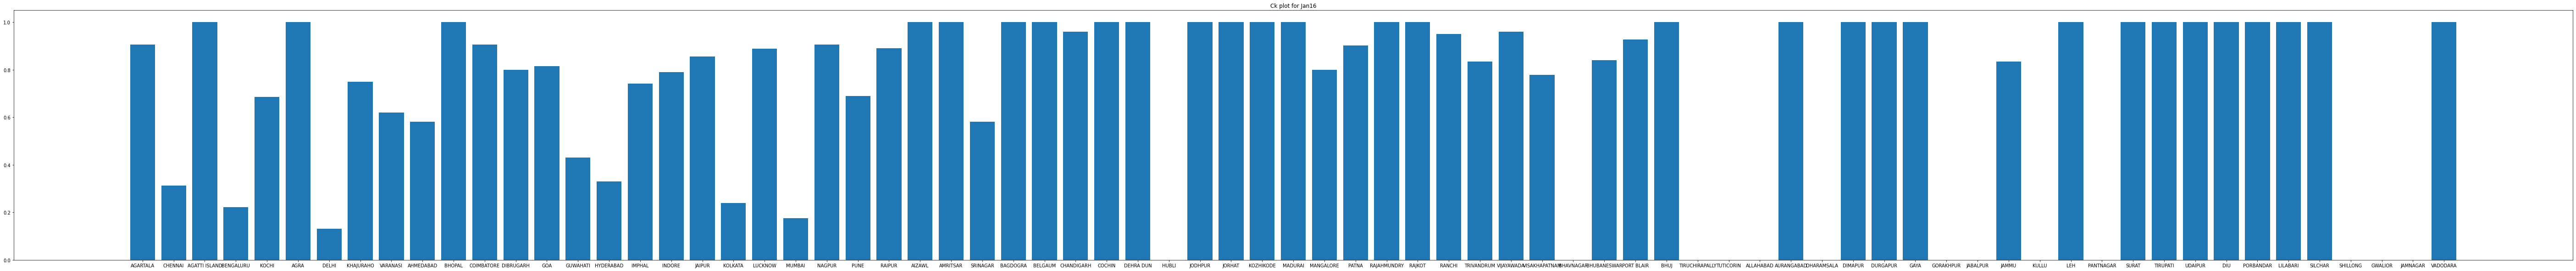

Average clustering coefficient for Jan16 is 0.69369373832812


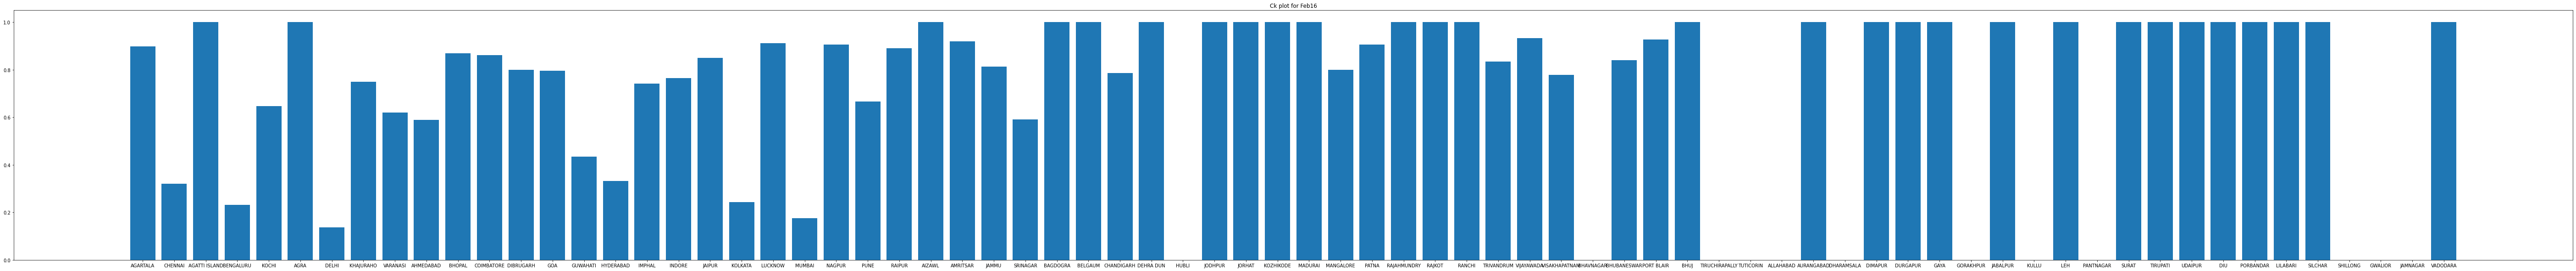

Average clustering coefficient for Feb16 is 0.6966290773198501


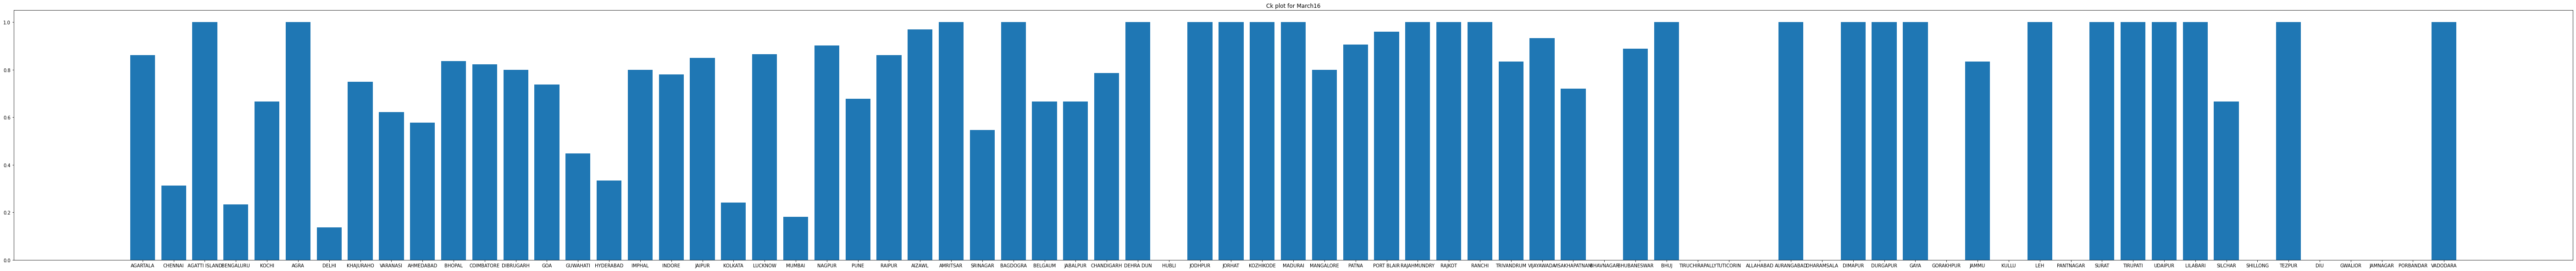

Average clustering coefficient for March16 is 0.6595565049614662


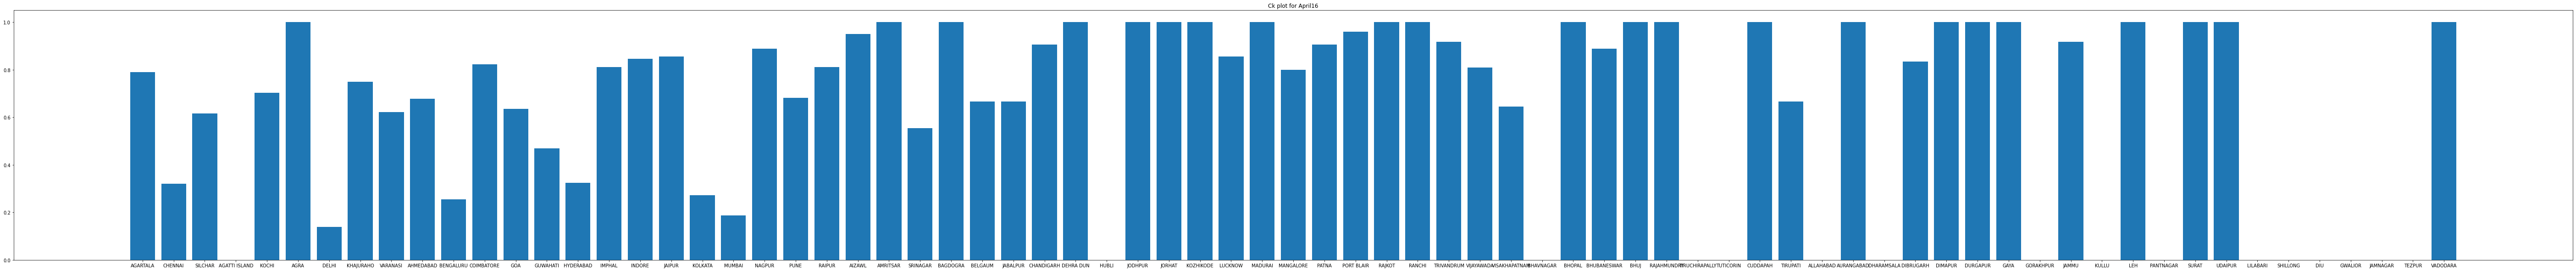

Average clustering coefficient for April16 is 0.6321229251222374


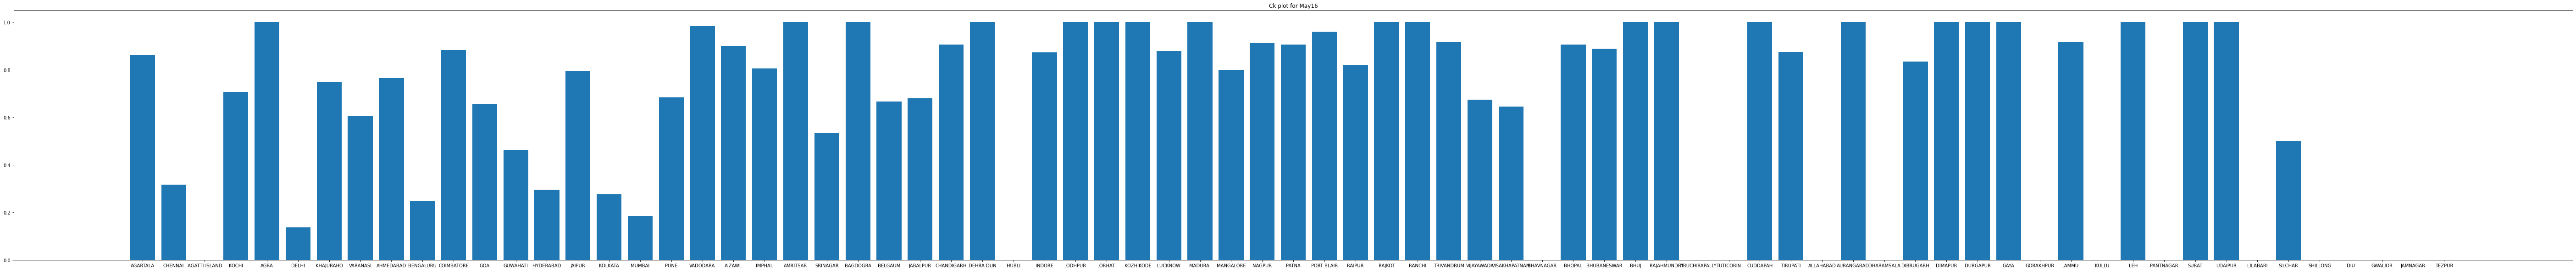

Average clustering coefficient for May16 is 0.6319548680423022


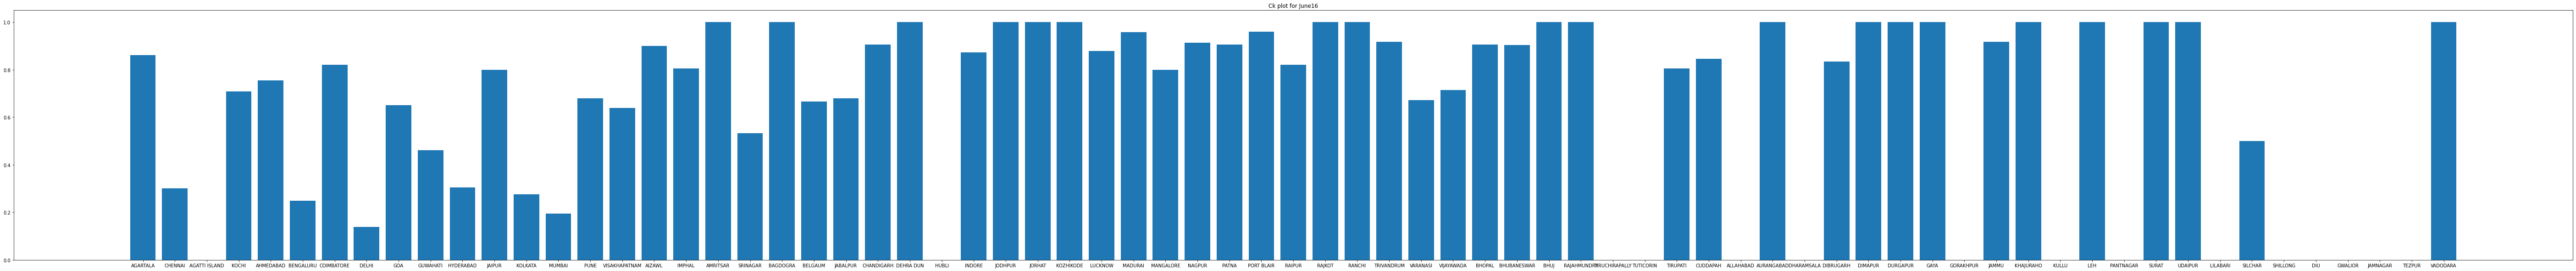

Average clustering coefficient for June16 is 0.6363281417691058


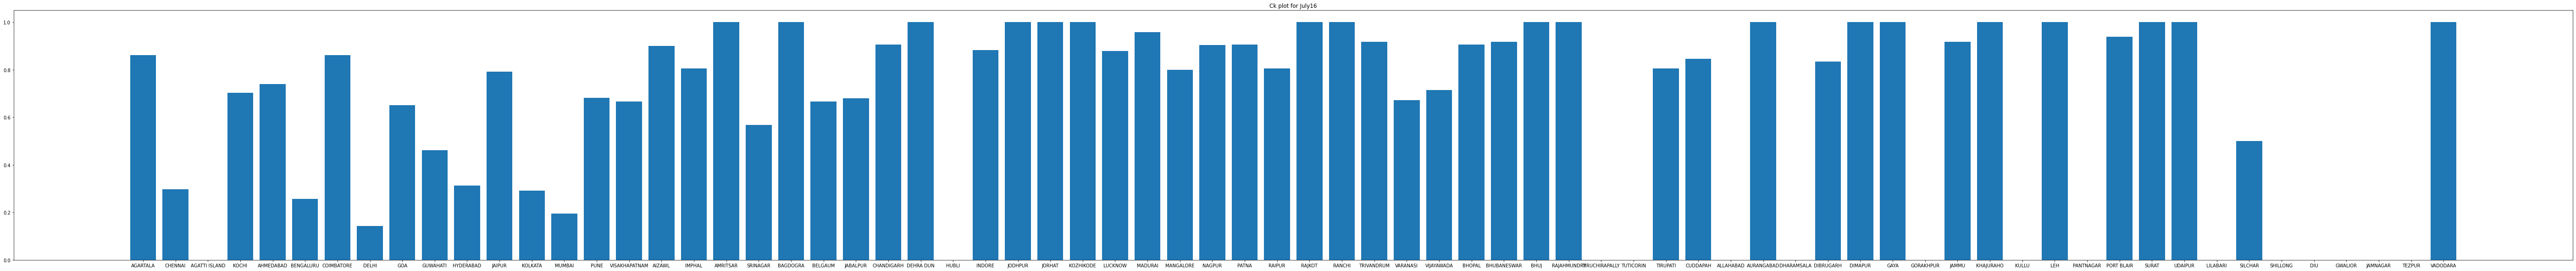

Average clustering coefficient for July16 is 0.6323666962822165


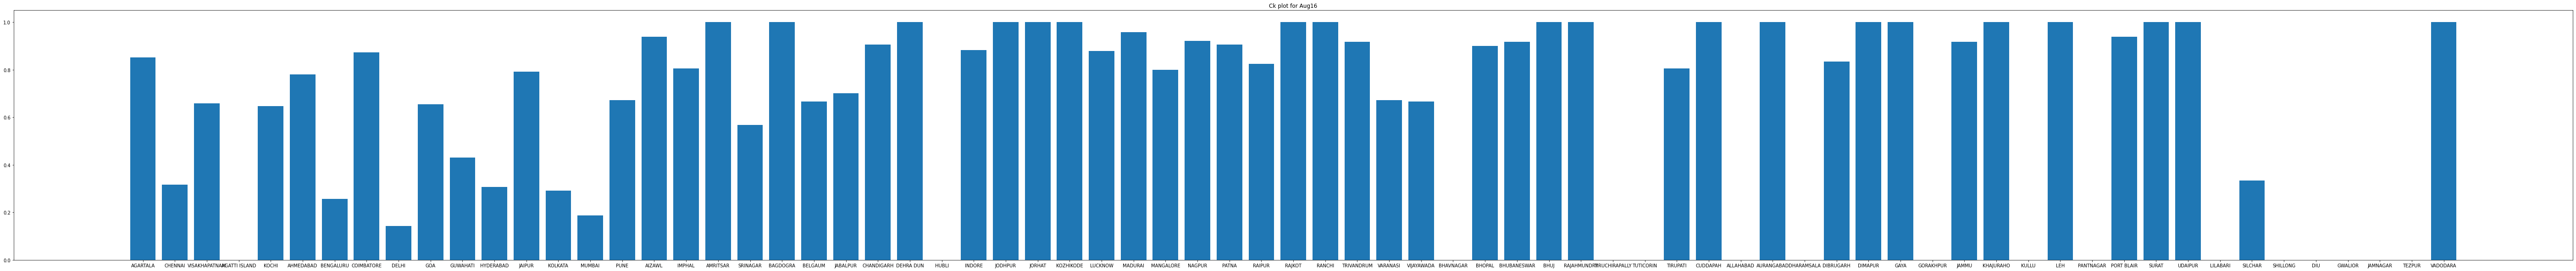

Average clustering coefficient for Aug16 is 0.6233599889391087


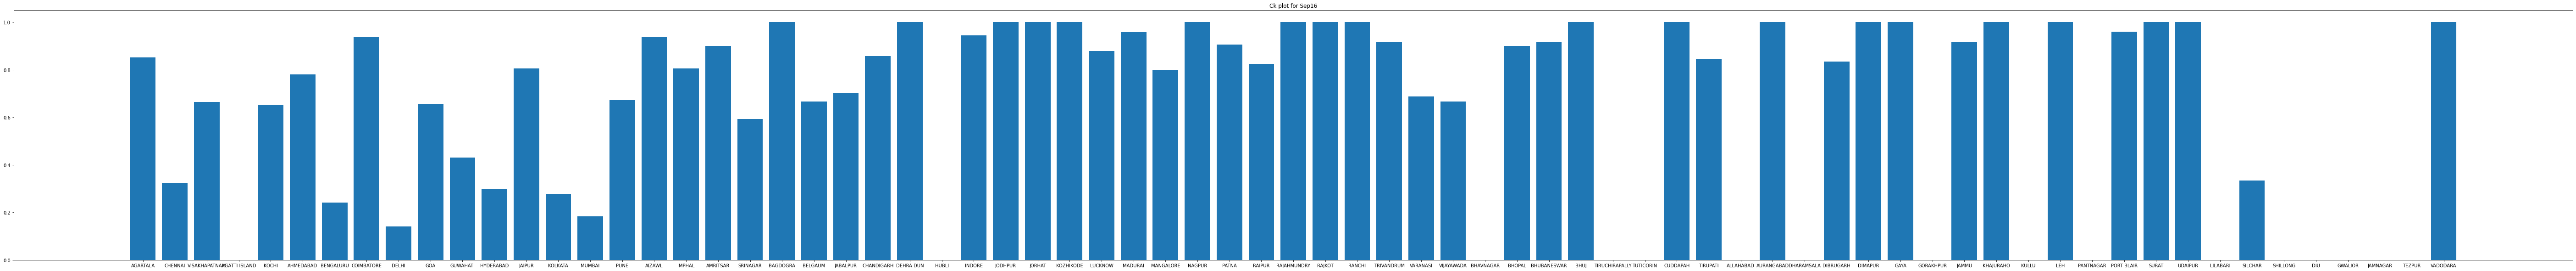

Average clustering coefficient for Sep16 is 0.6254546476390479


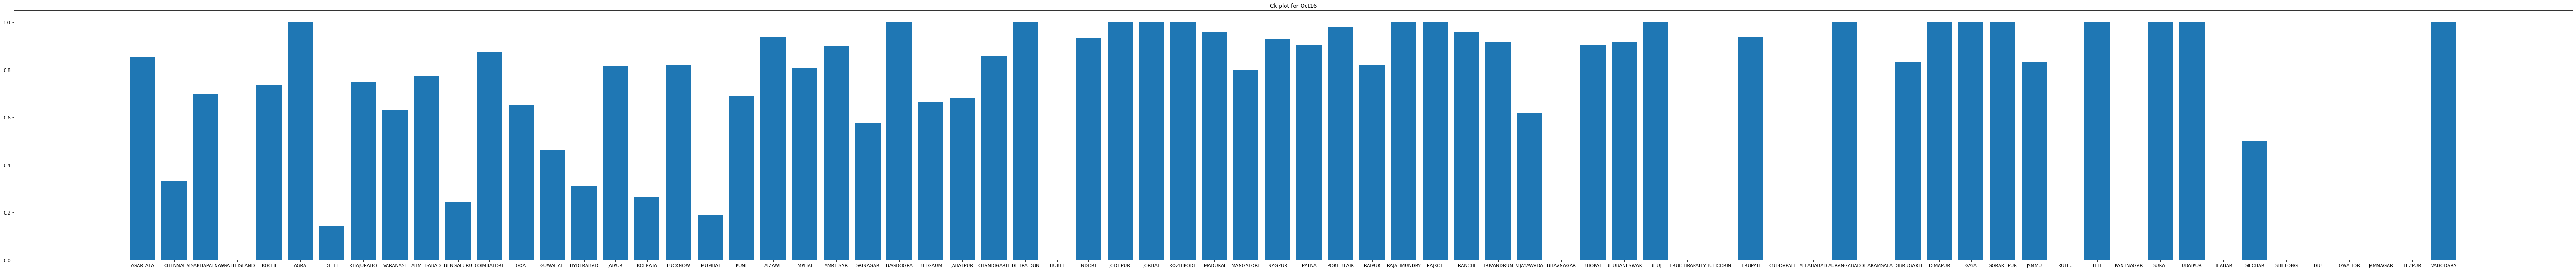

Average clustering coefficient for Oct16 is 0.6269650963970975


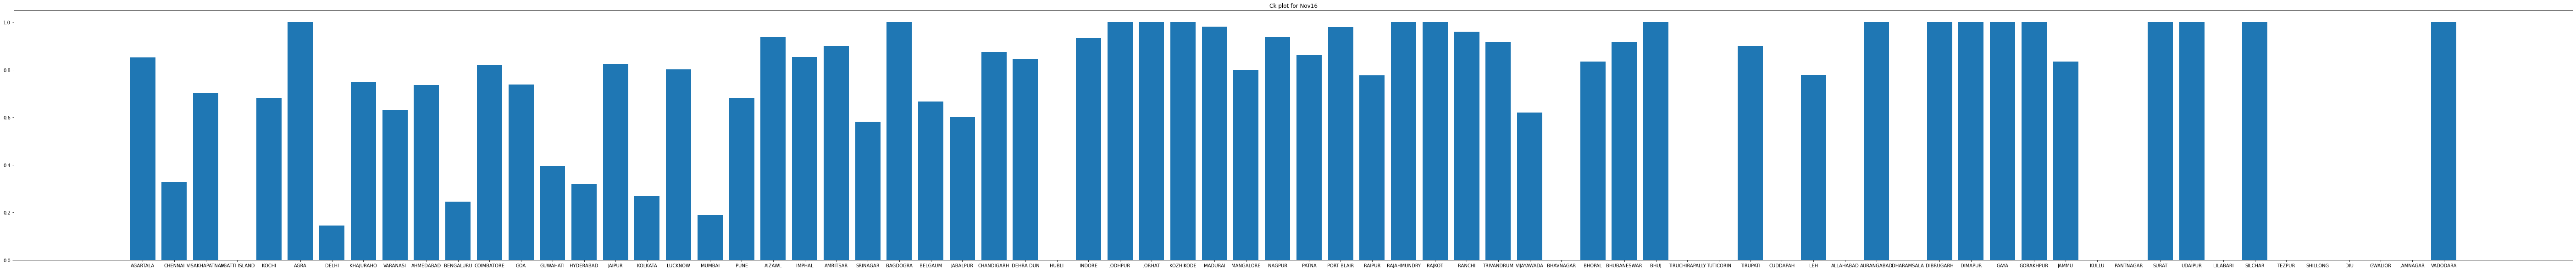

Average clustering coefficient for Nov16 is 0.6268369260880876


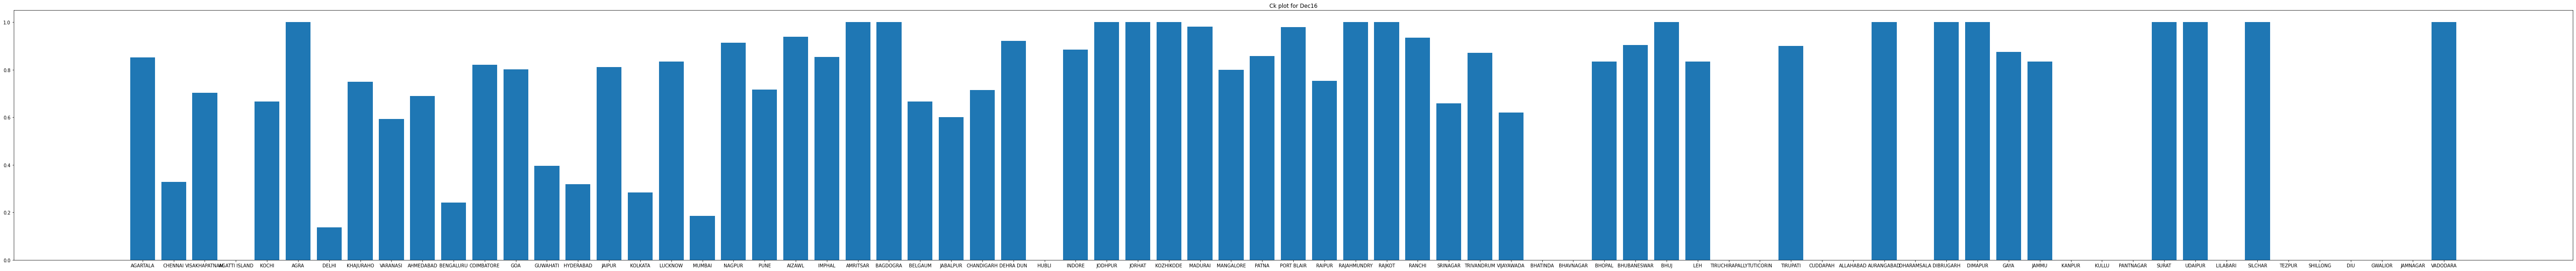

Average clustering coefficient for Dec16 is 0.6032204554676618


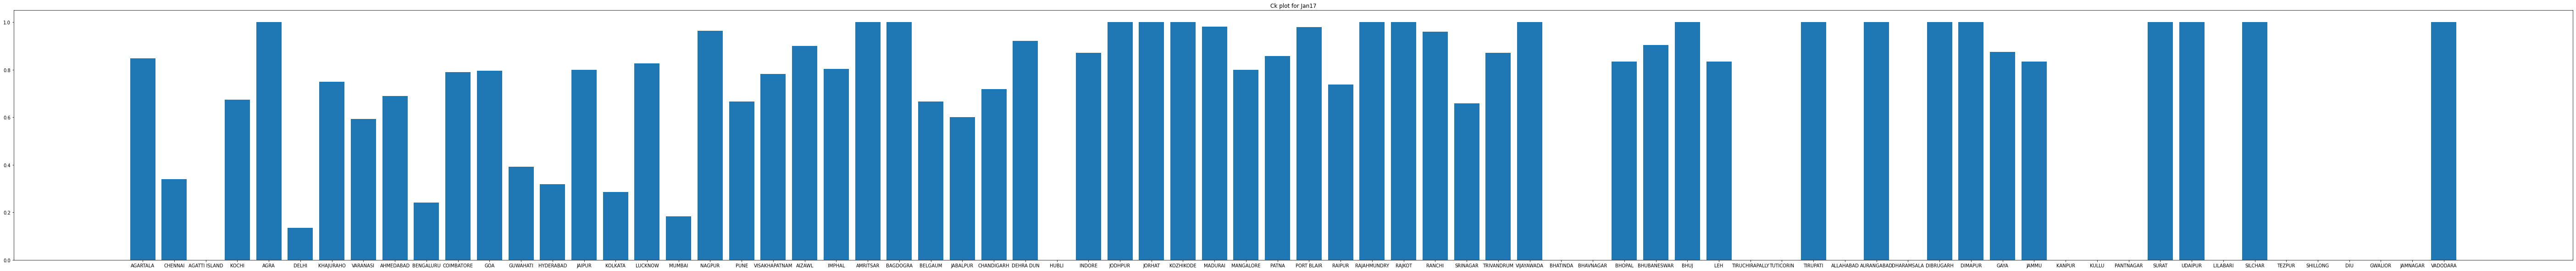

Average clustering coefficient for Jan17 is 0.6171729272012769


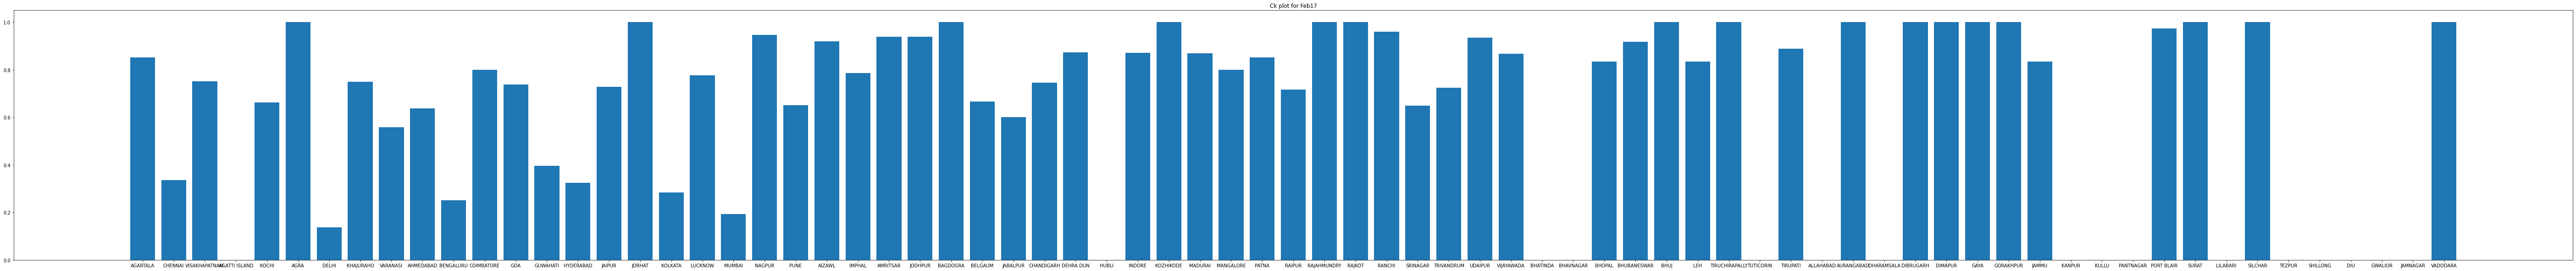

Average clustering coefficient for Feb17 is 0.6232828243696308


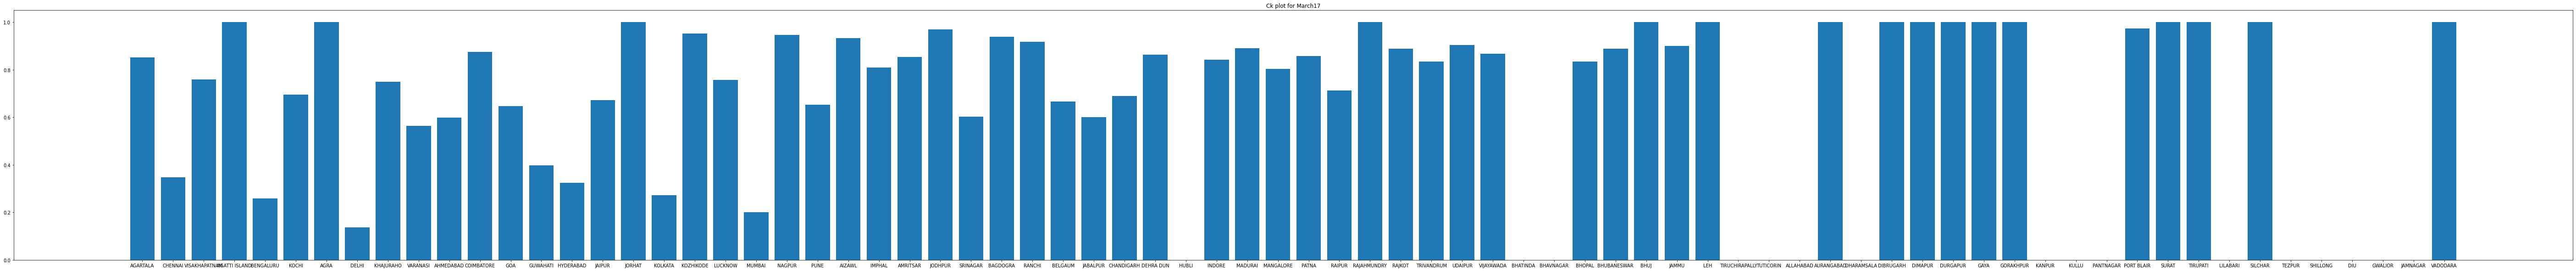

Average clustering coefficient for March17 is 0.6275080553947547


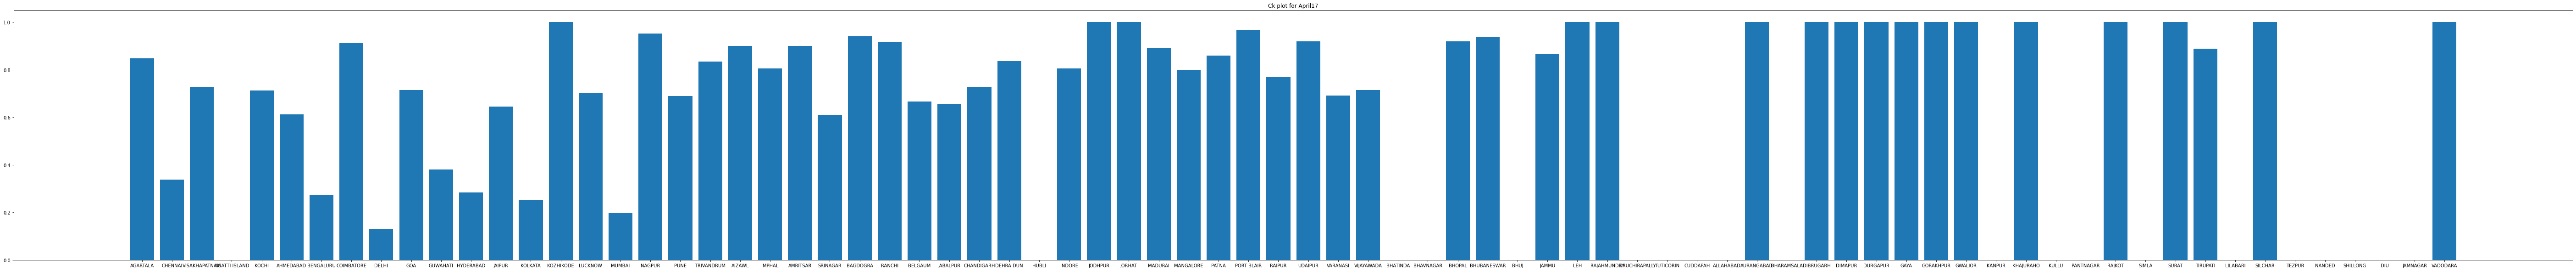

Average clustering coefficient for April17 is 0.5920601357197458


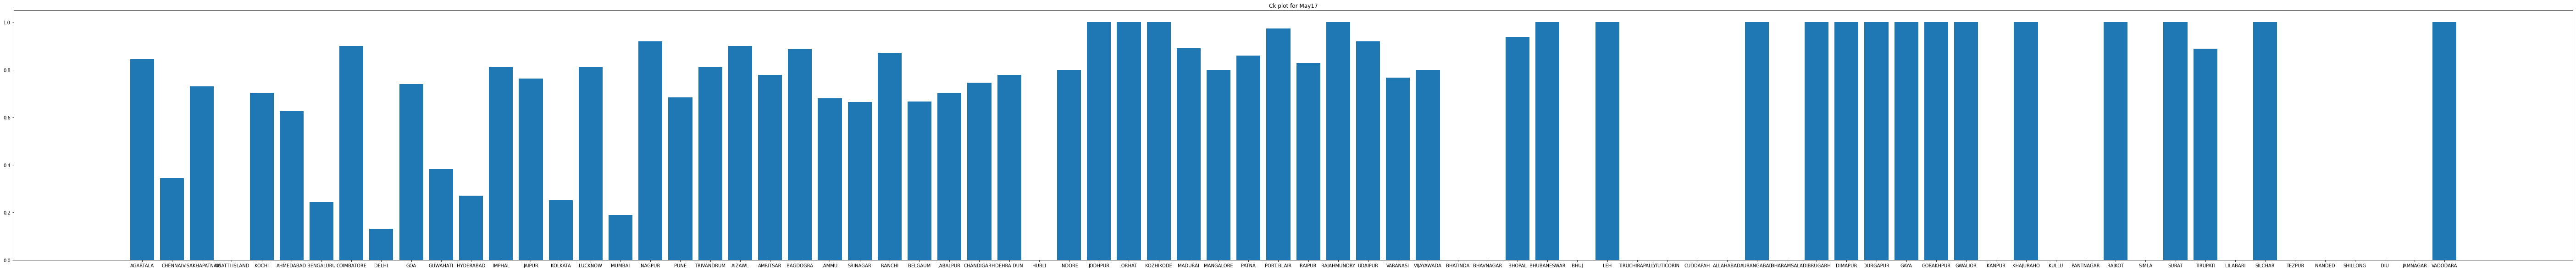

Average clustering coefficient for May17 is 0.5933196687157581


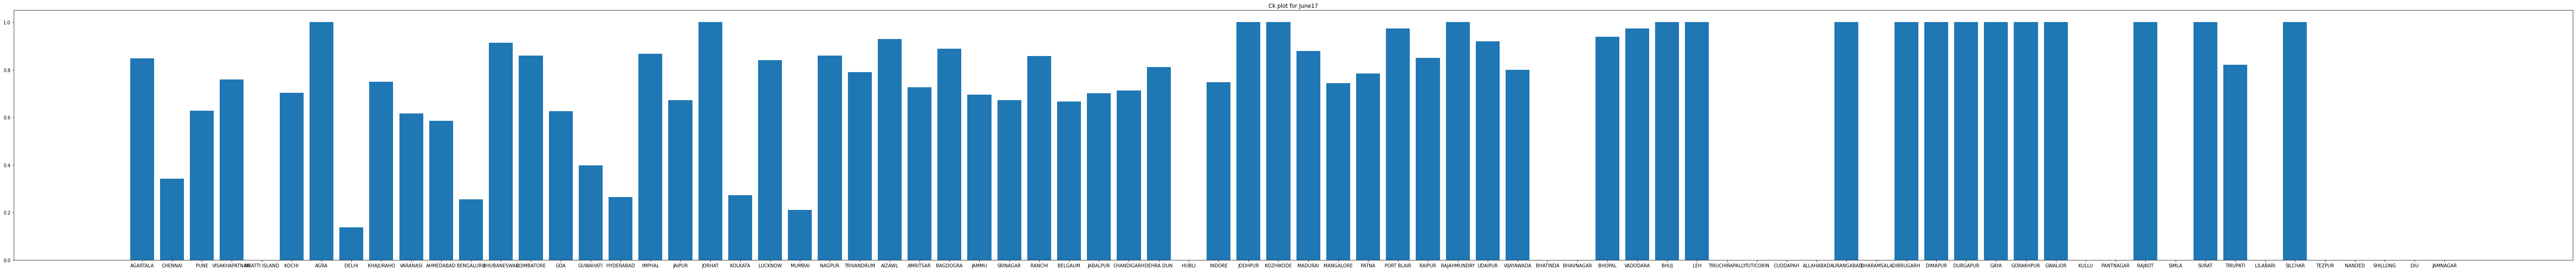

Average clustering coefficient for June17 is 0.6061079519229782


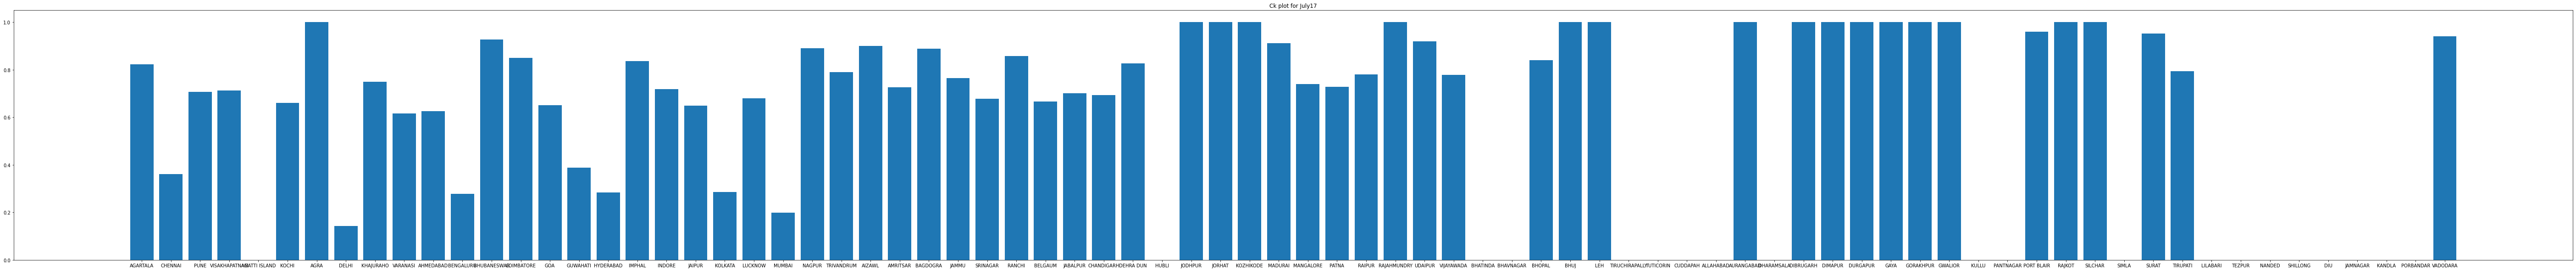

Average clustering coefficient for July17 is 0.5857739543027225


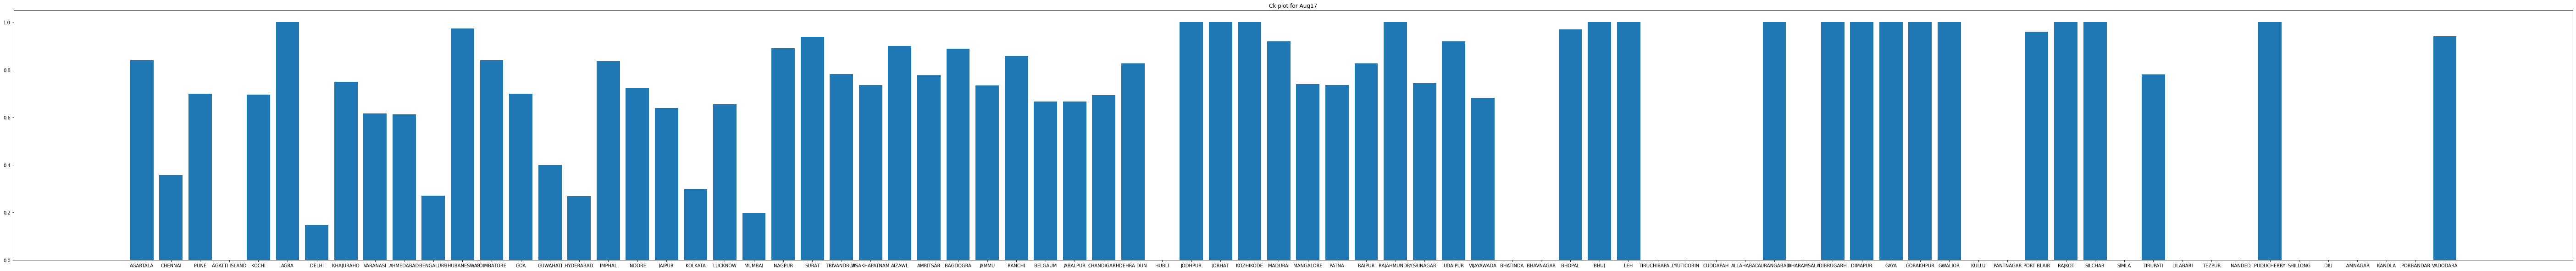

Average clustering coefficient for Aug17 is 0.5886183760125808


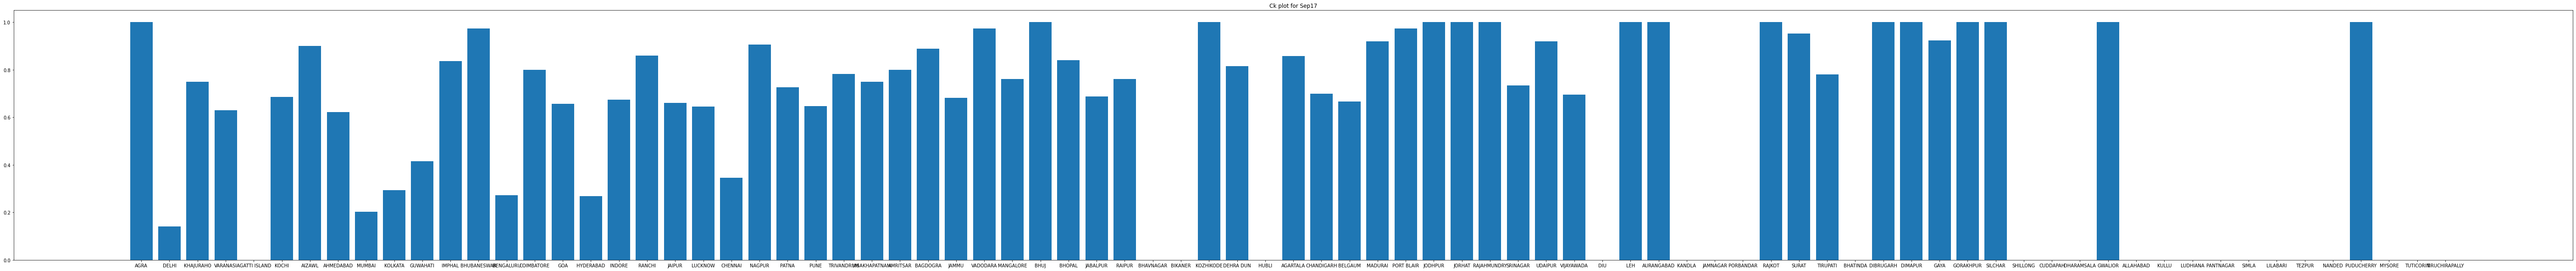

Average clustering coefficient for Sep17 is 0.5633735437085967


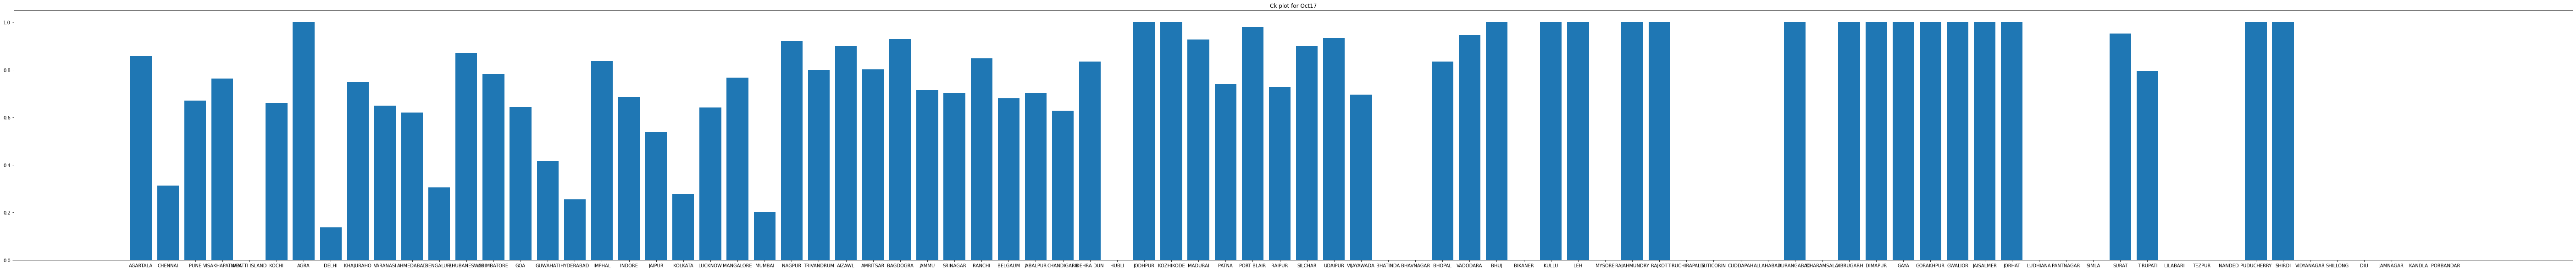

Average clustering coefficient for Oct17 is 0.5758083528479883


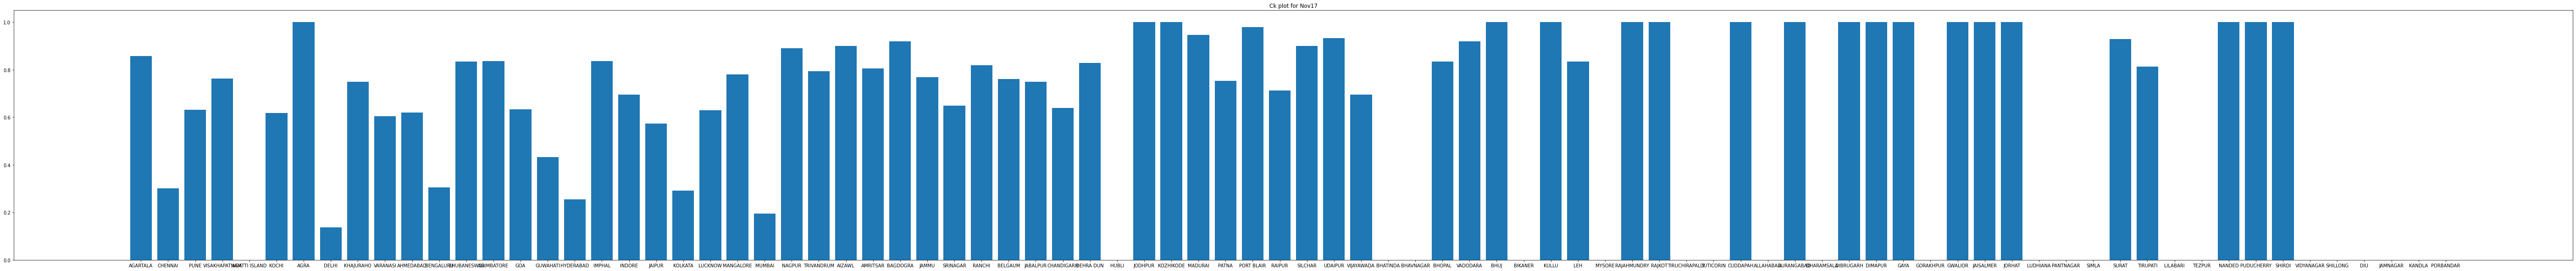

Average clustering coefficient for Nov17 is 0.5852830879773115


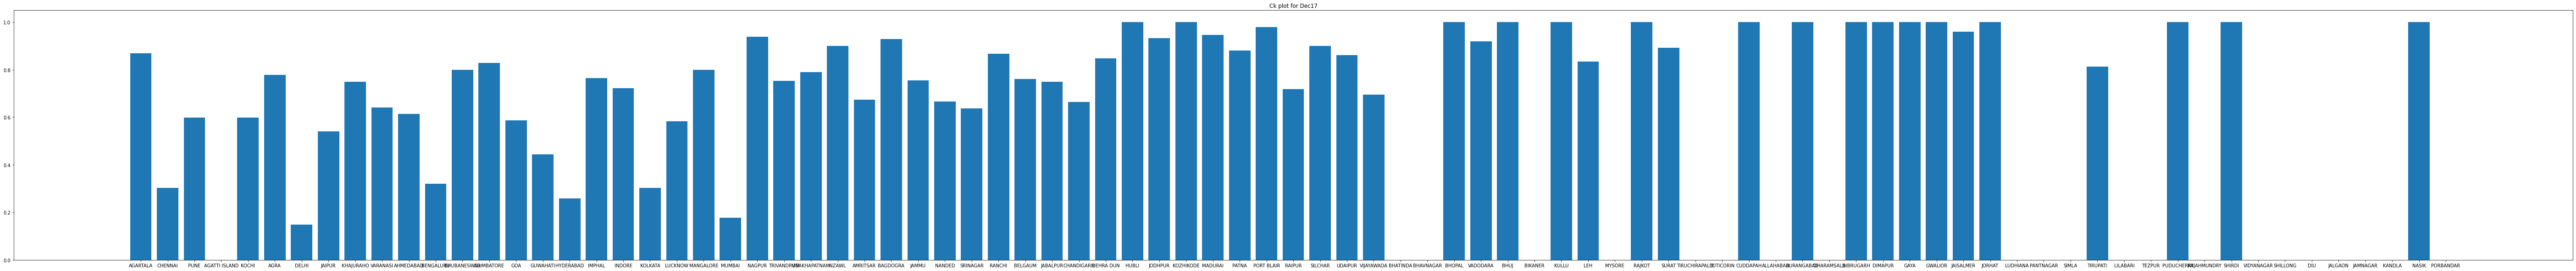

Average clustering coefficient for Dec17 is 0.5825425414298436


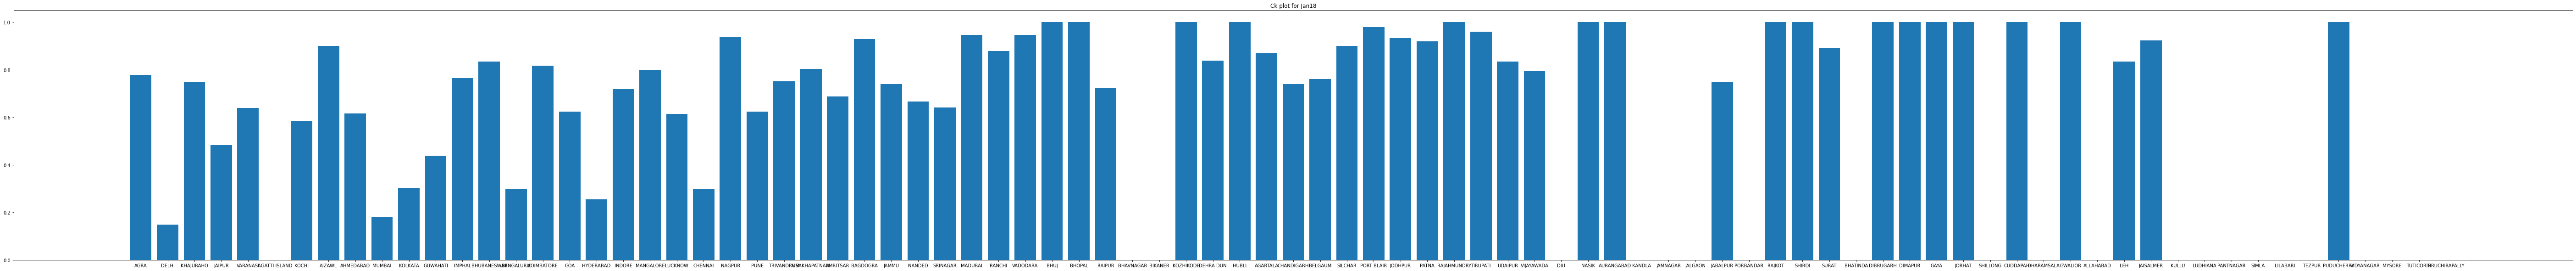

Average clustering coefficient for Jan18 is 0.5866554693623044


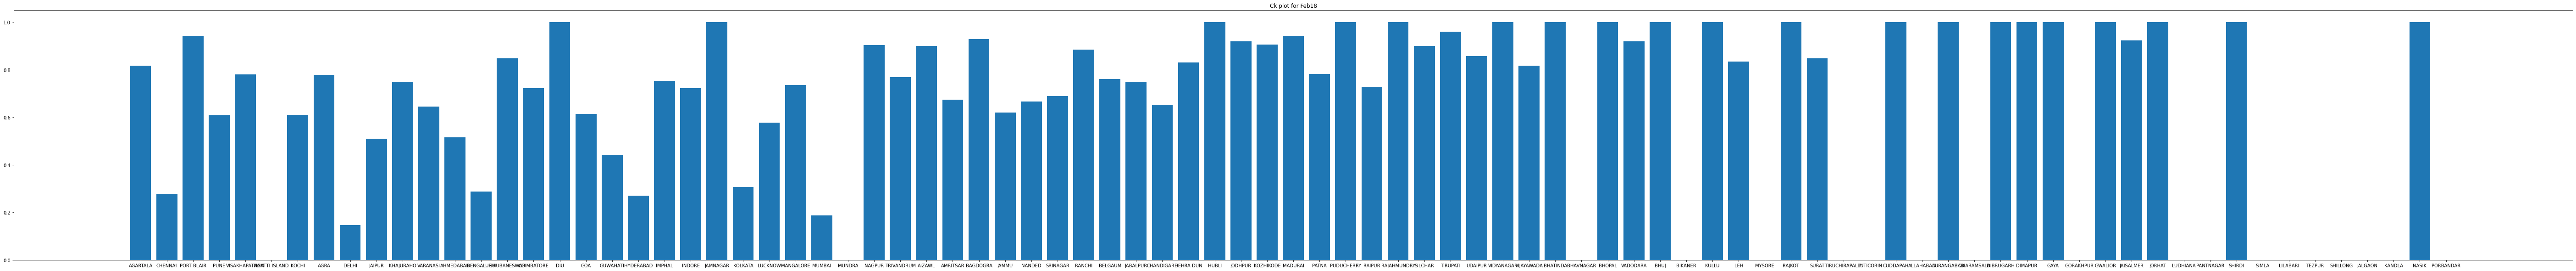

Average clustering coefficient for Feb18 is 0.6202433246434469


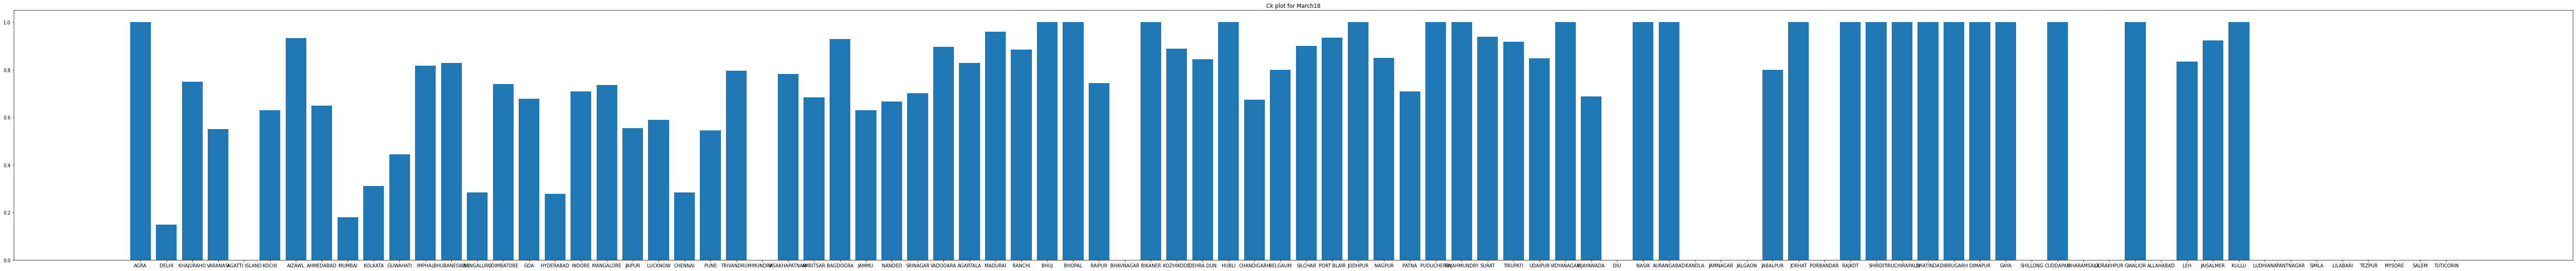

Average clustering coefficient for March18 is 0.6185437881298714


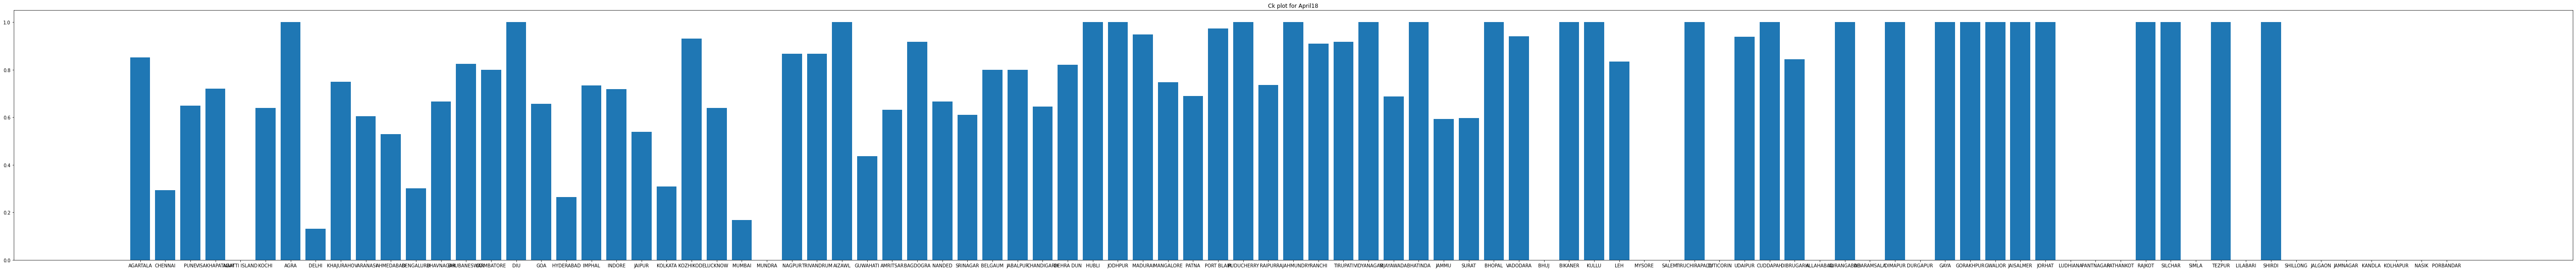

Average clustering coefficient for April18 is 0.6143329190521183


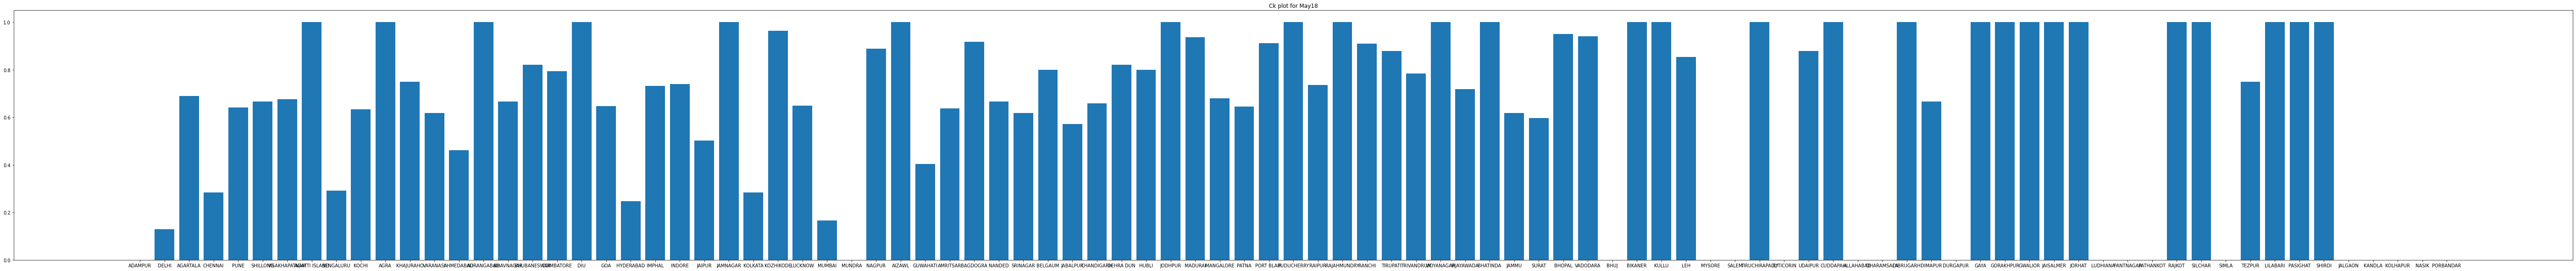

Average clustering coefficient for May18 is 0.6345530482468985


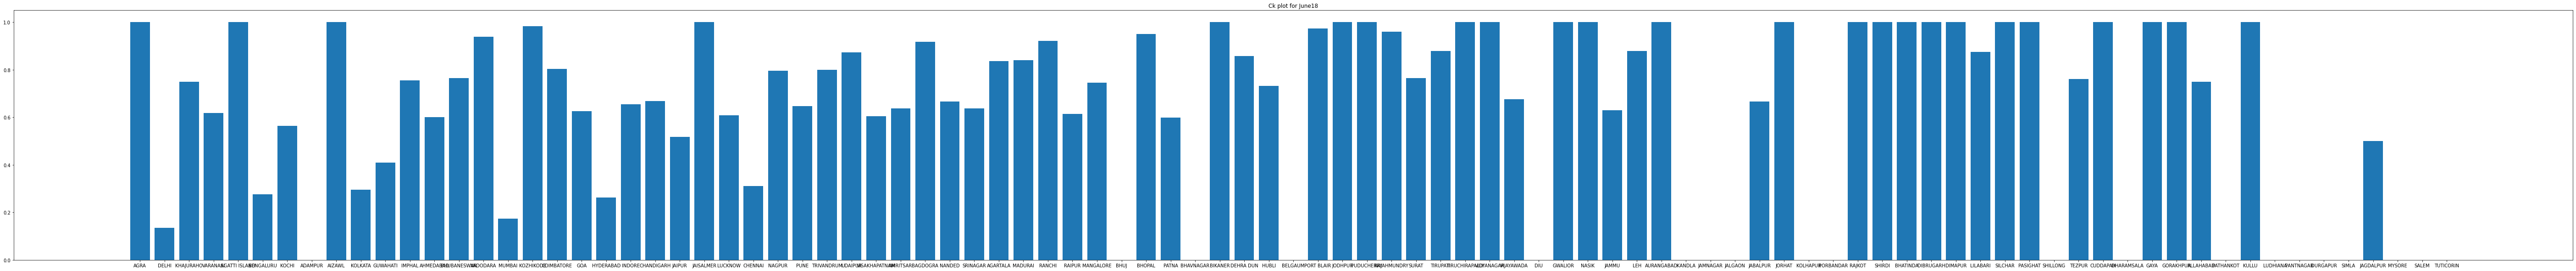

Average clustering coefficient for June18 is 0.6177463249585887


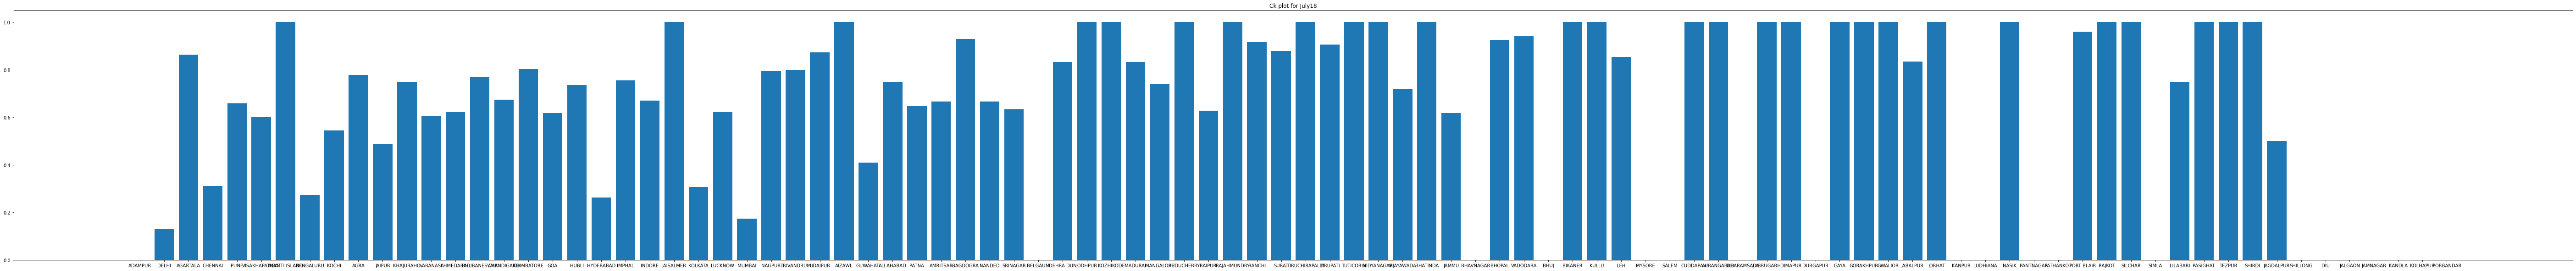

Average clustering coefficient for July18 is 0.6251015617840582


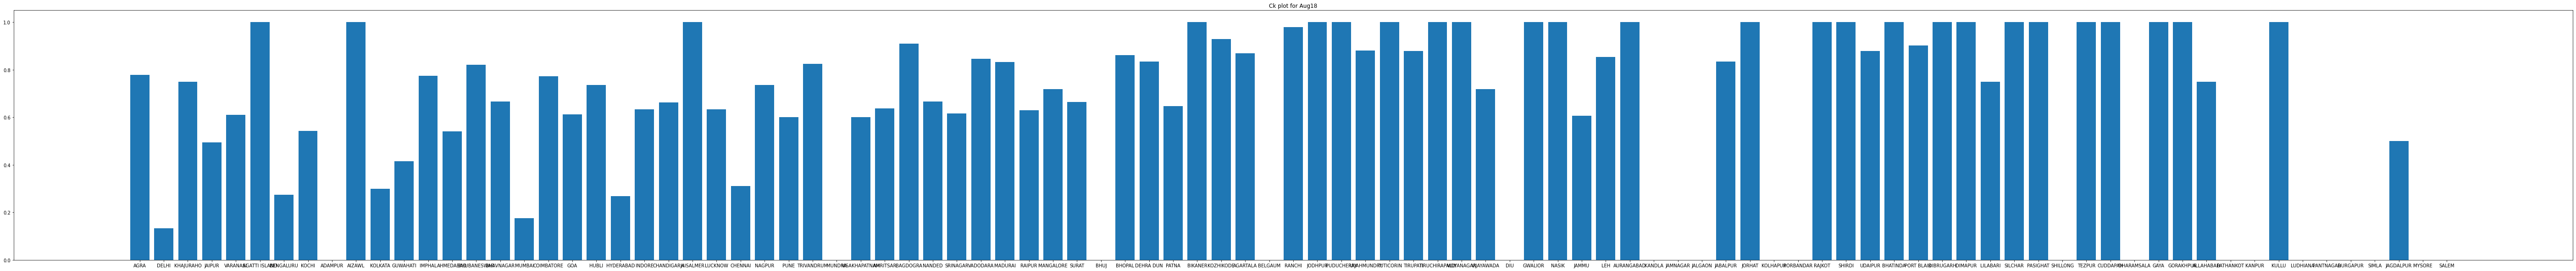

Average clustering coefficient for Aug18 is 0.6169538585892361


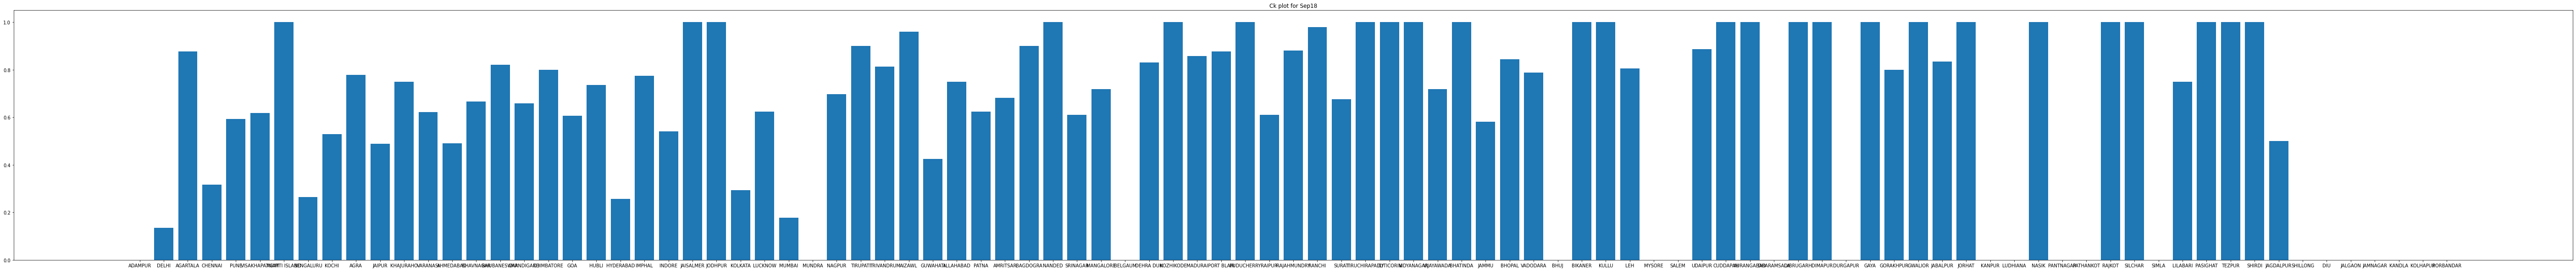

Average clustering coefficient for Sep18 is 0.6154873100518206


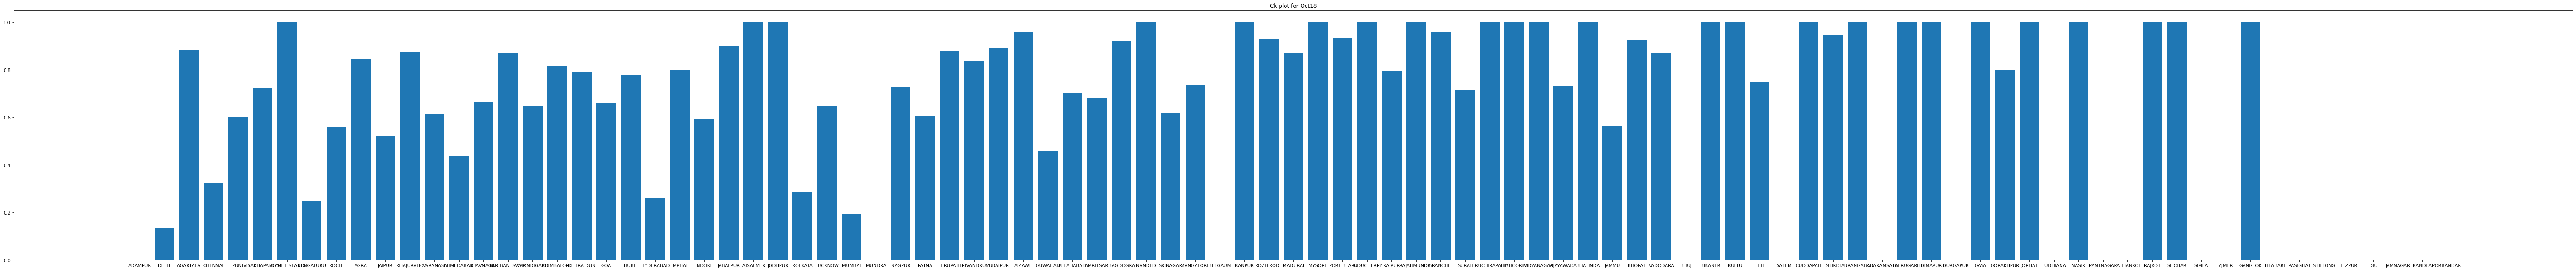

Average clustering coefficient for Oct18 is 0.6258950676931799


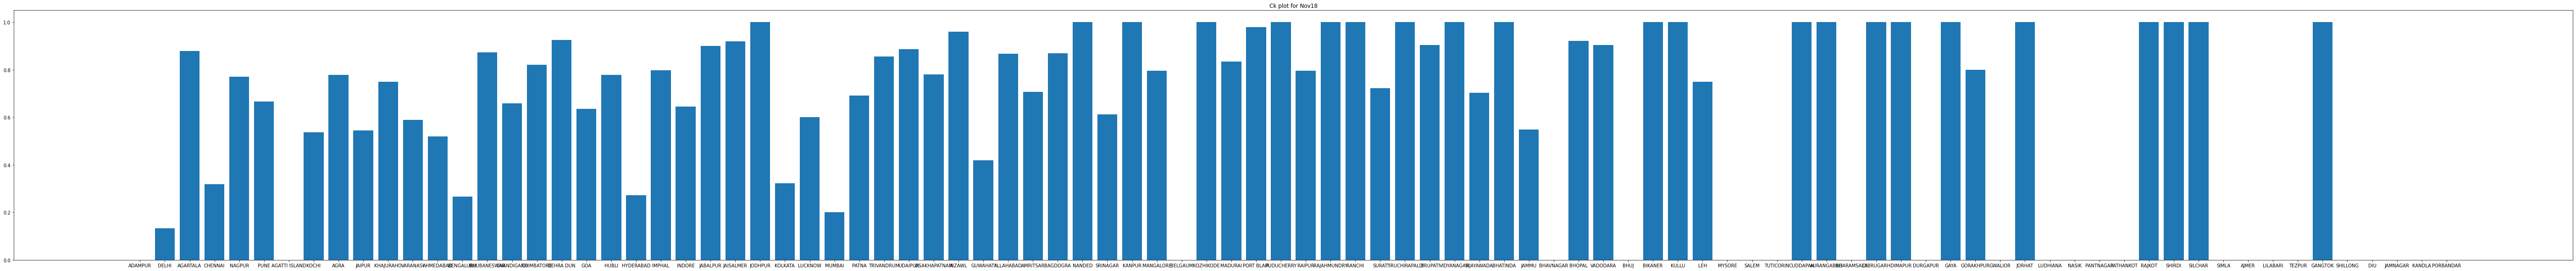

Average clustering coefficient for Nov18 is 0.5893105048473128


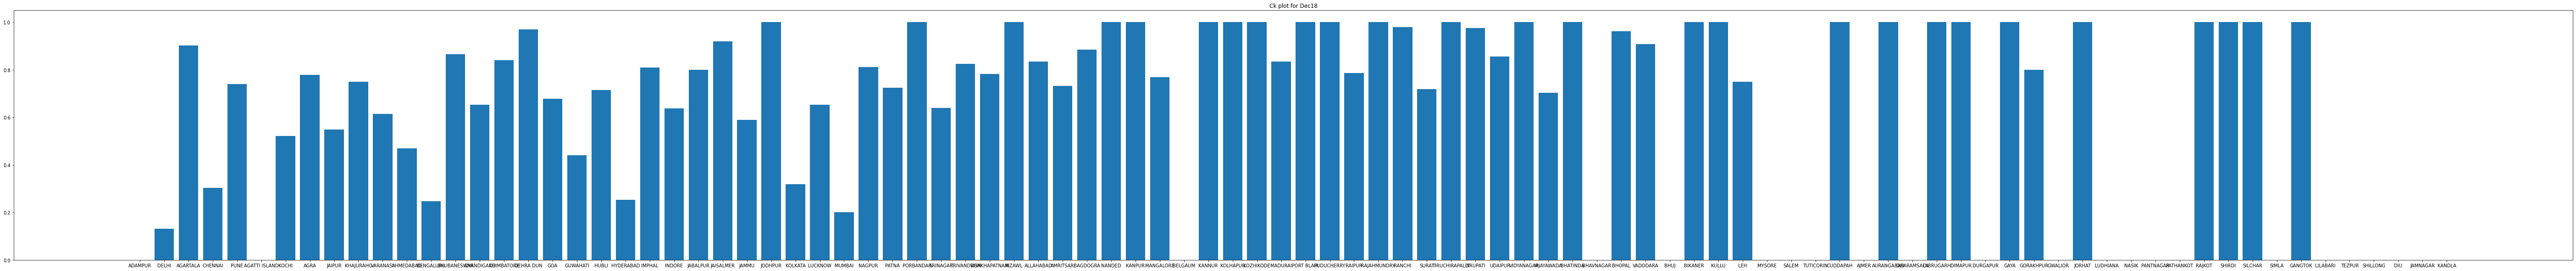

Average clustering coefficient for Dec18 is 0.6105391182159144


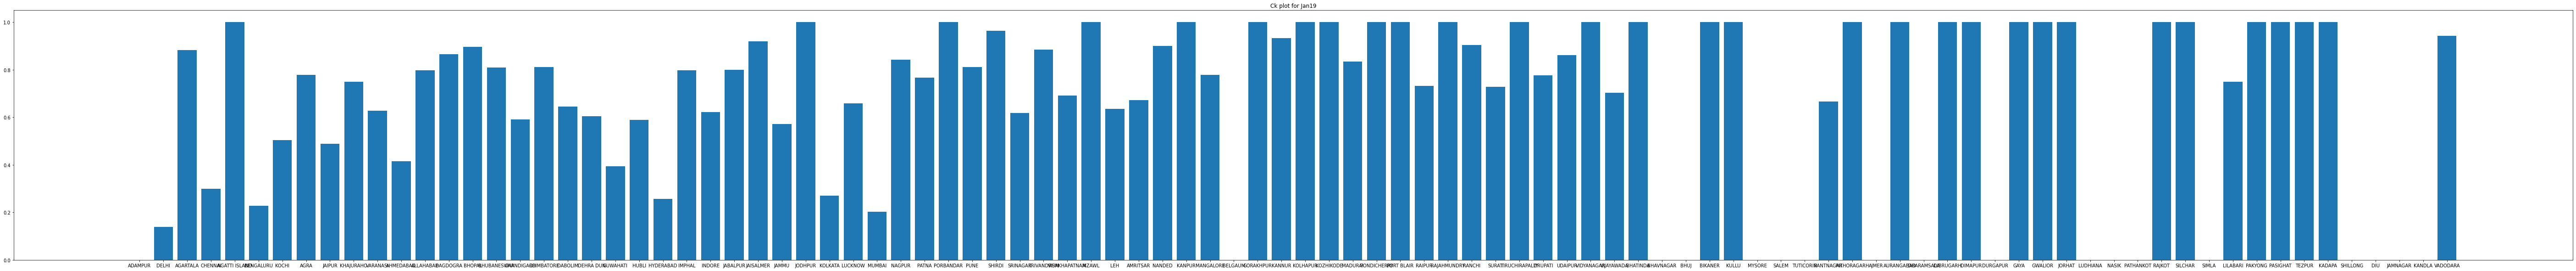

Average clustering coefficient for Jan19 is 0.6489689704690754


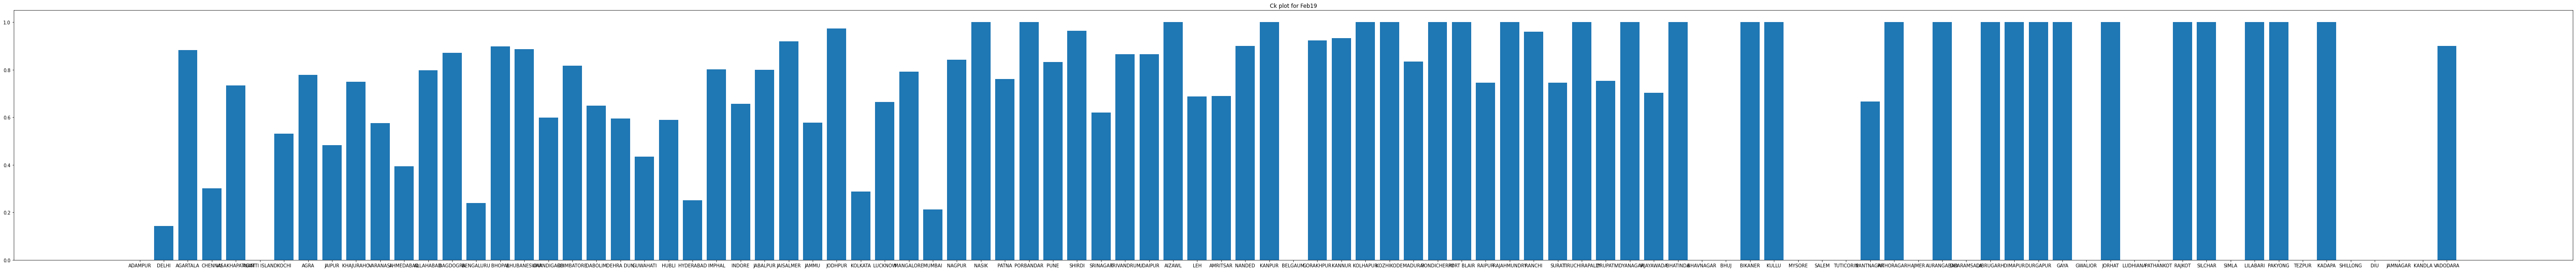

Average clustering coefficient for Feb19 is 0.6397132332218435


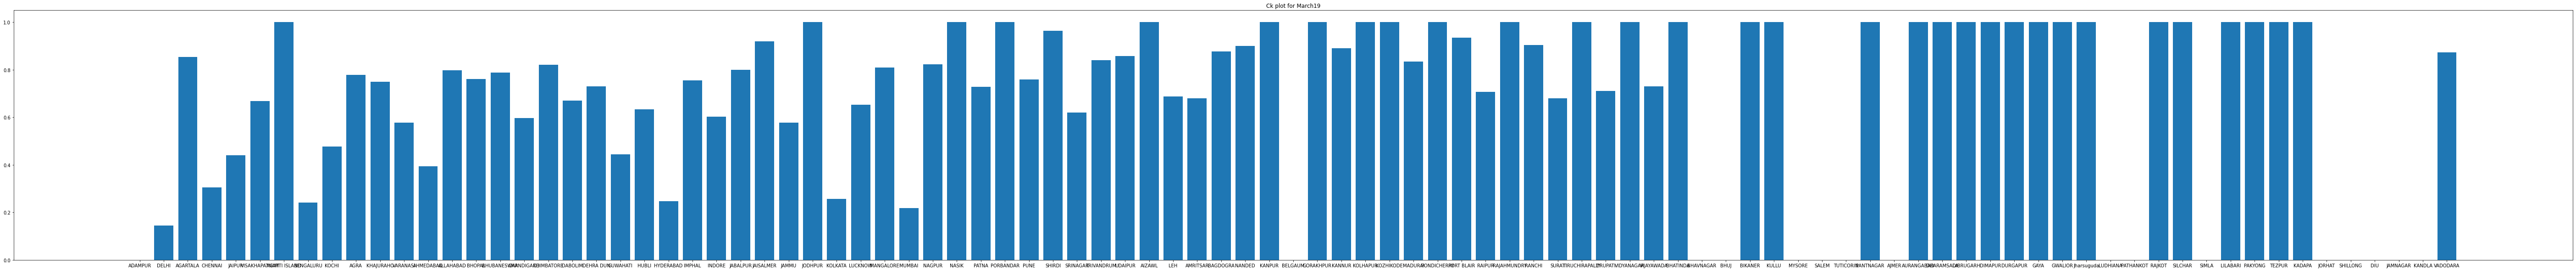

Average clustering coefficient for March19 is 0.6669833388044324


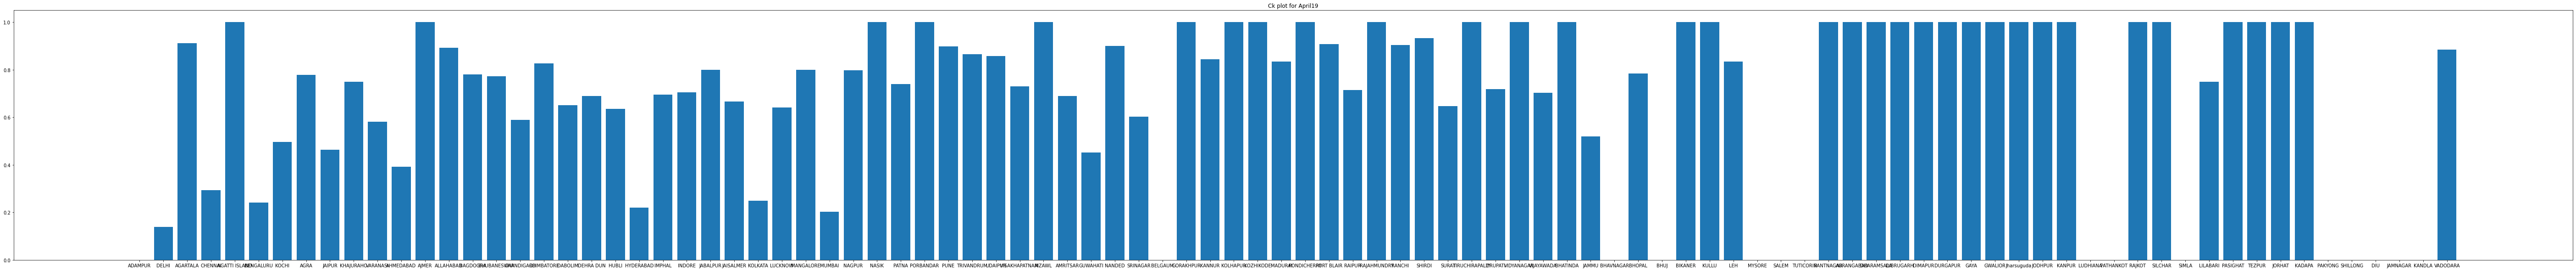

Average clustering coefficient for April19 is 0.6771895053661425


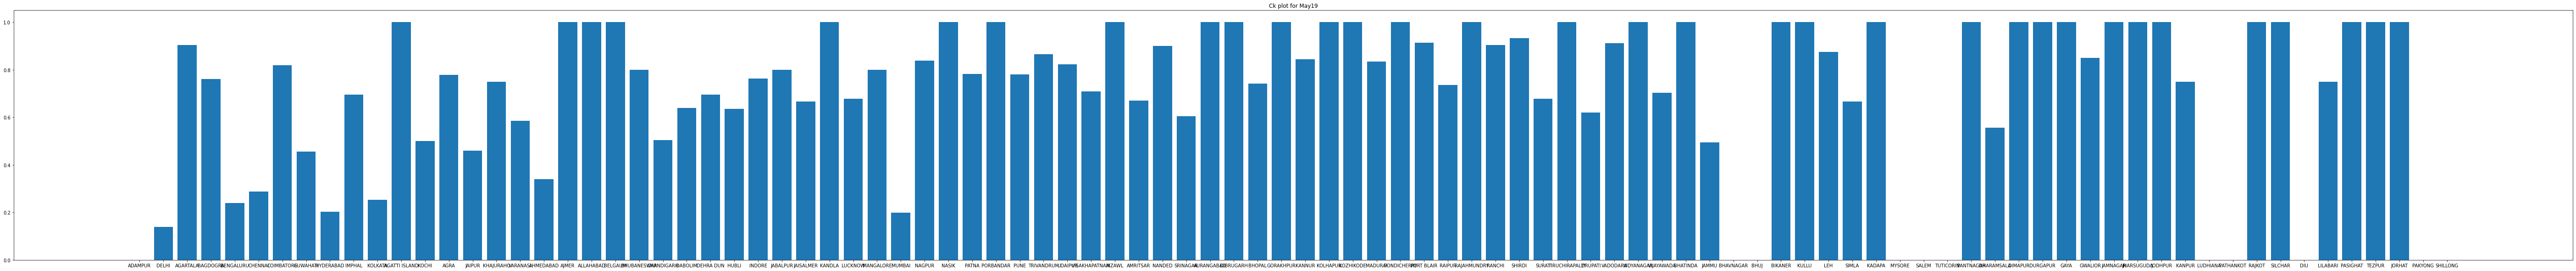

Average clustering coefficient for May19 is 0.7047739627898083


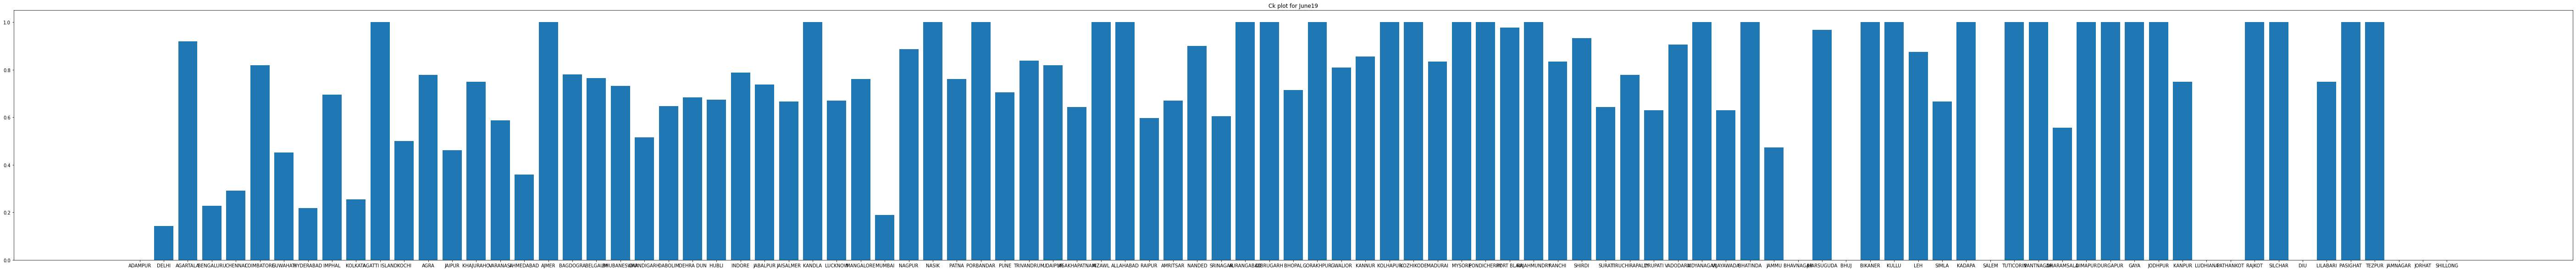

Average clustering coefficient for June19 is 0.7015462320896422


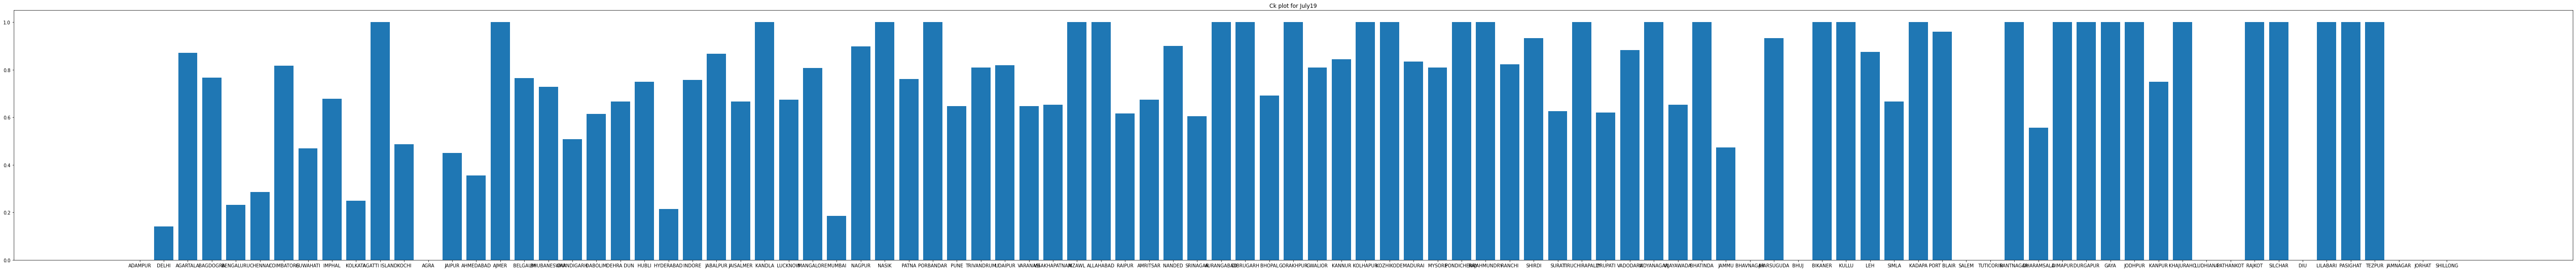

Average clustering coefficient for July19 is 0.6882022251804628


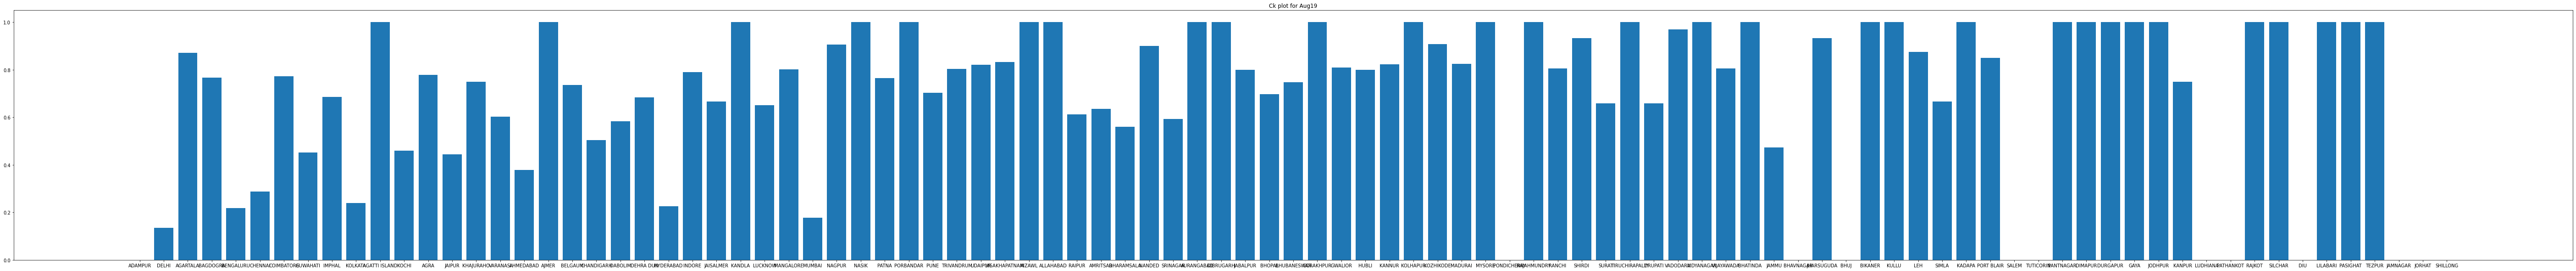

Average clustering coefficient for Aug19 is 0.6862380983268591


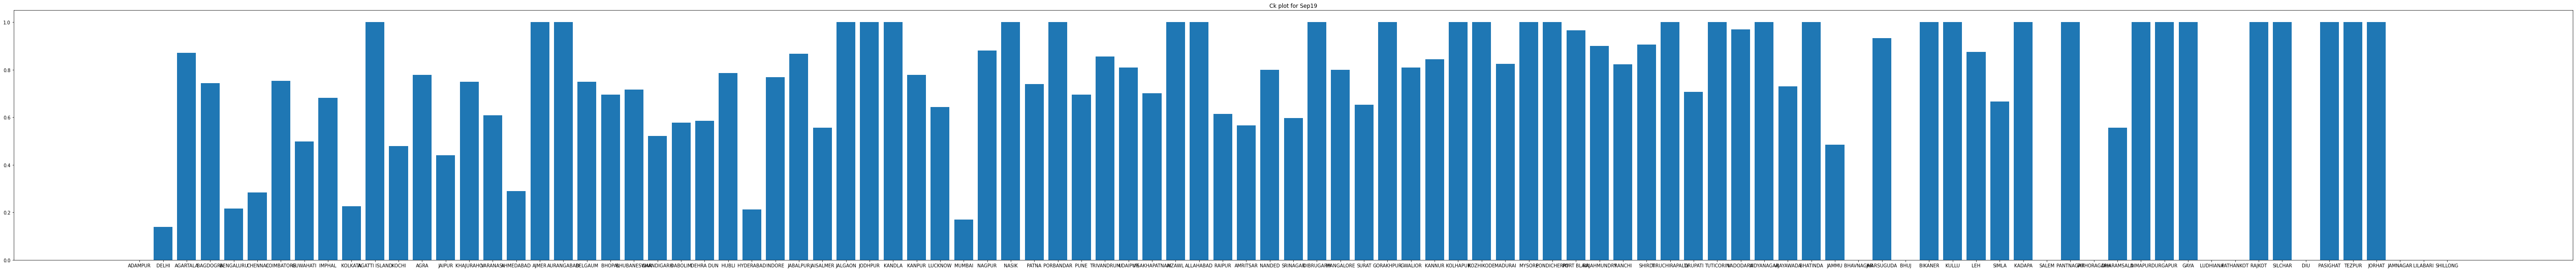

Average clustering coefficient for Sep19 is 0.697720820454833


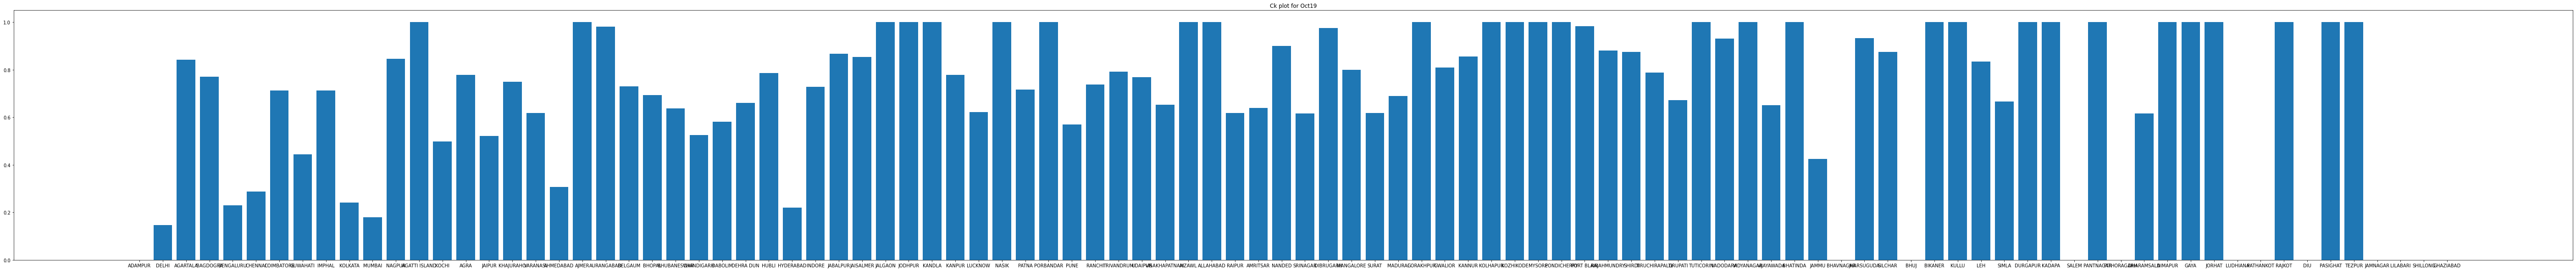

Average clustering coefficient for Oct19 is 0.6841918975913565


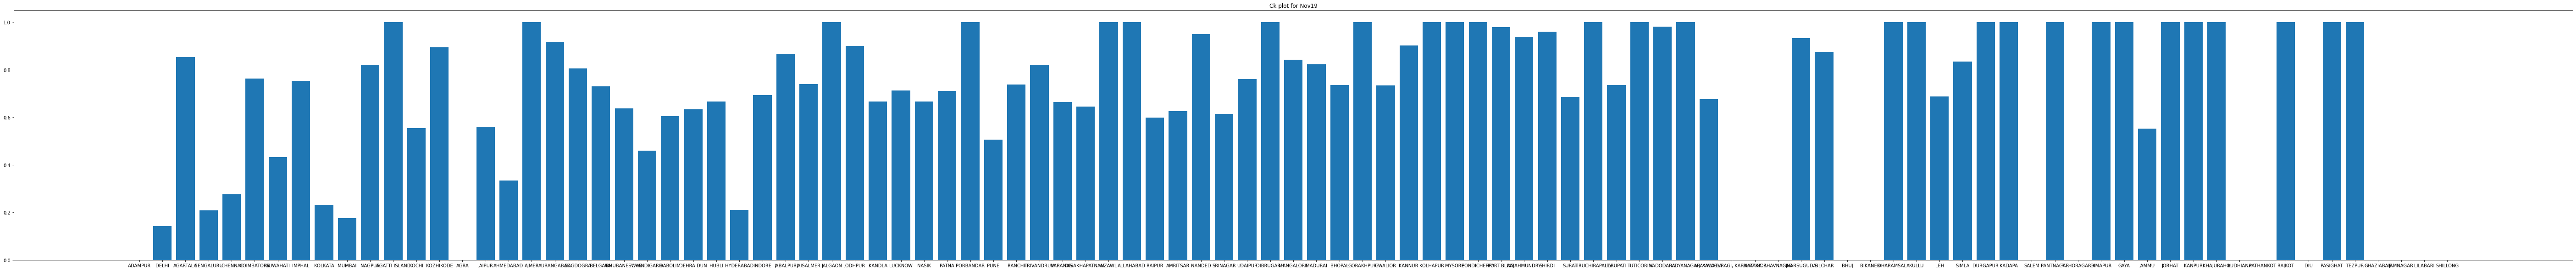

Average clustering coefficient for Nov19 is 0.6574408028545494


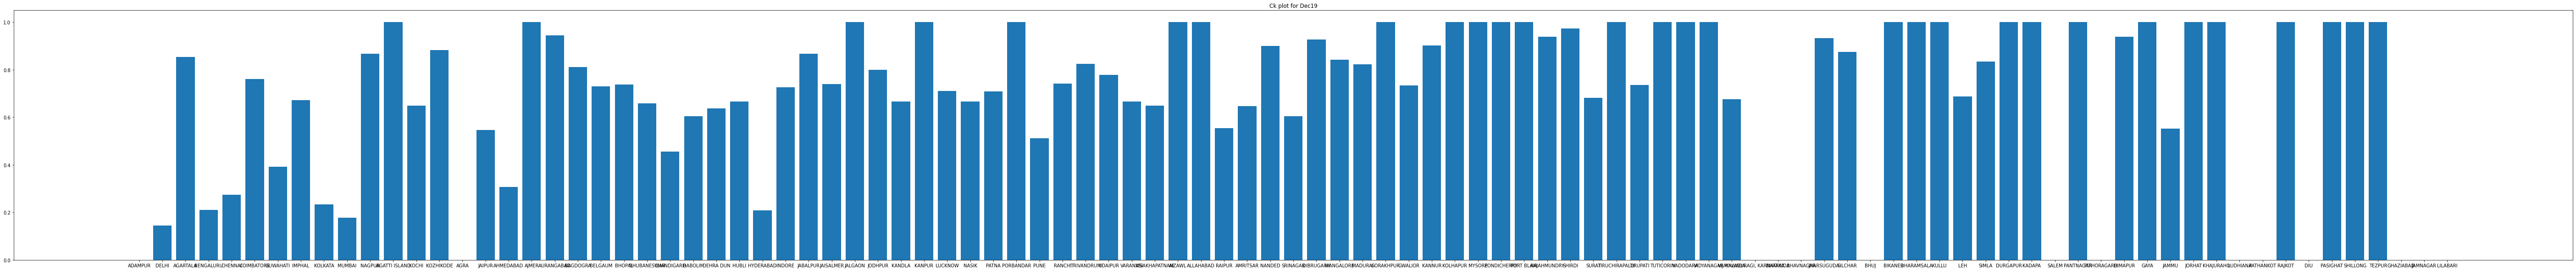

Average clustering coefficient for Dec19 is 0.6755178064041797


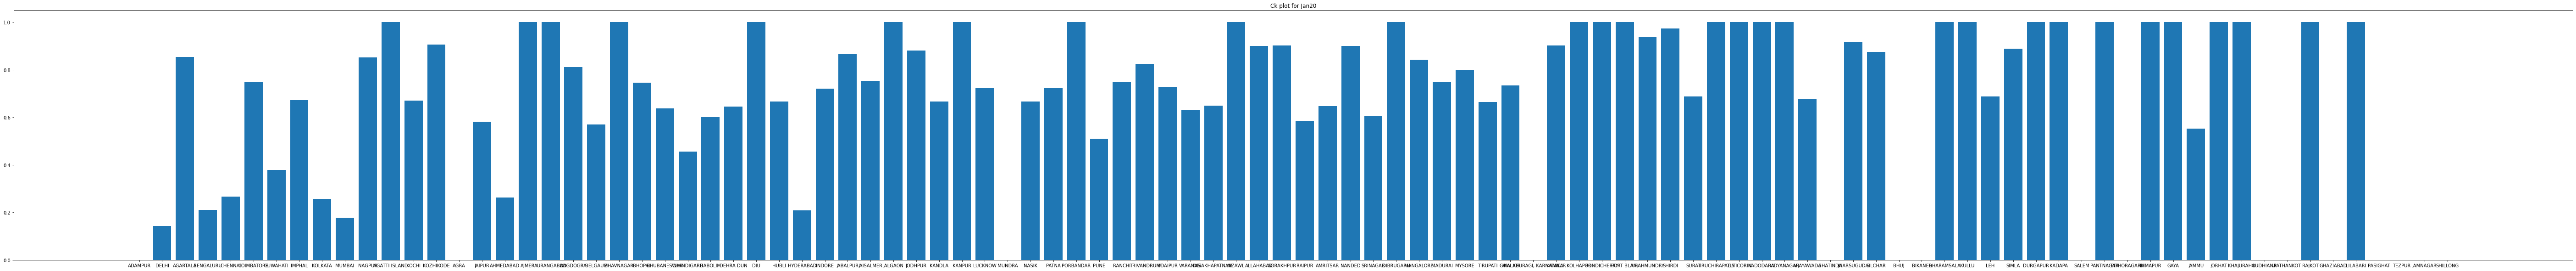

Average clustering coefficient for Jan20 is 0.6550786230822395


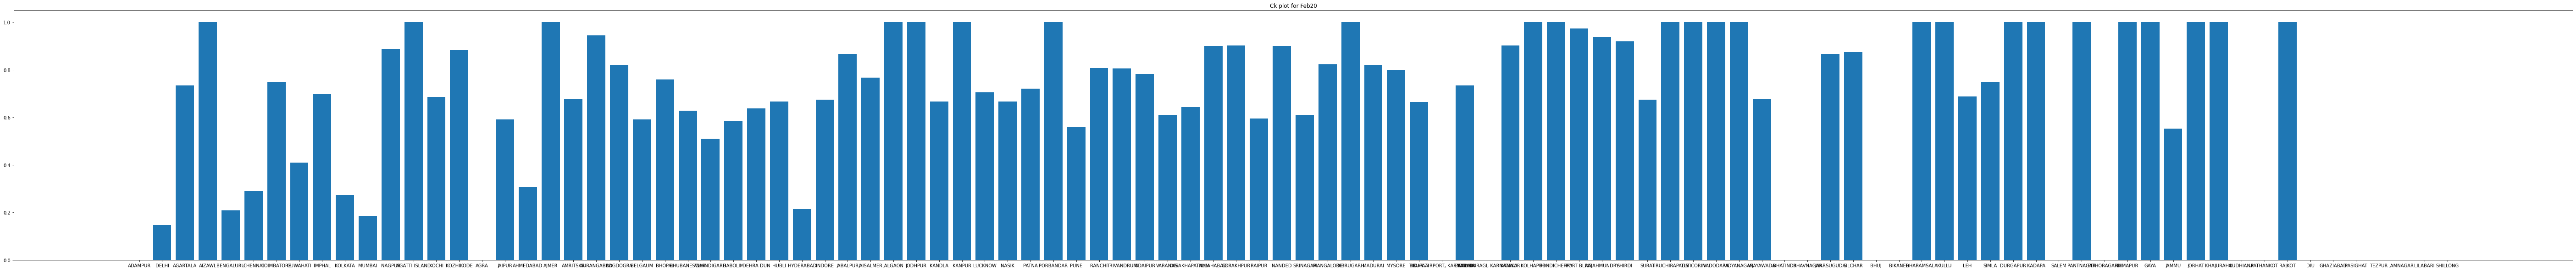

Average clustering coefficient for Feb20 is 0.626415226090609


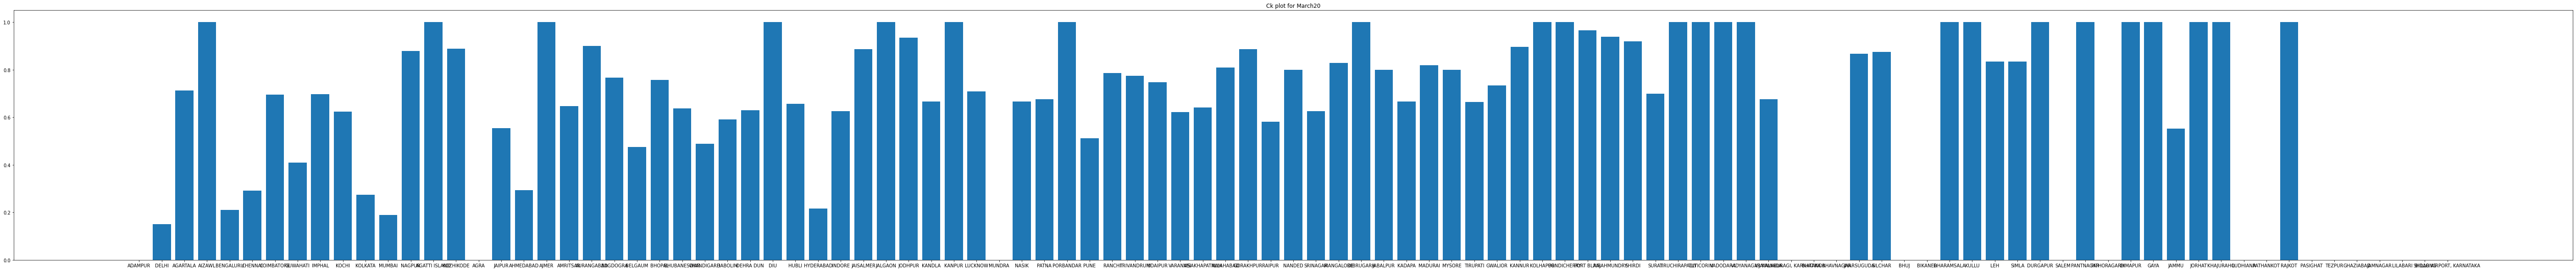

Average clustering coefficient for March20 is 0.6207365656542412


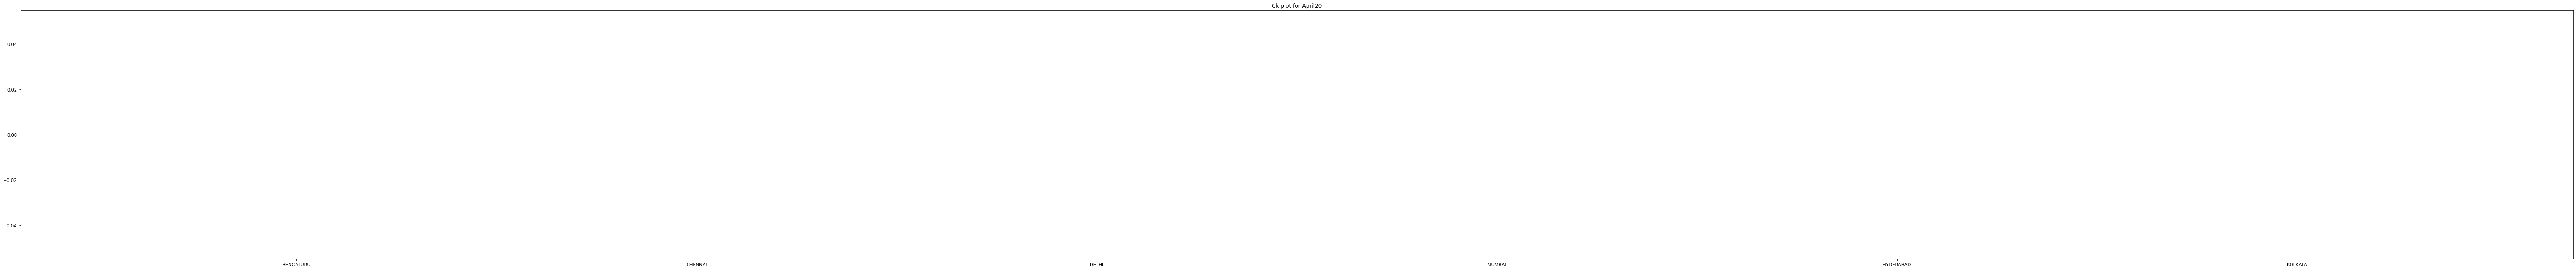

Average clustering coefficient for April20 is 0.0


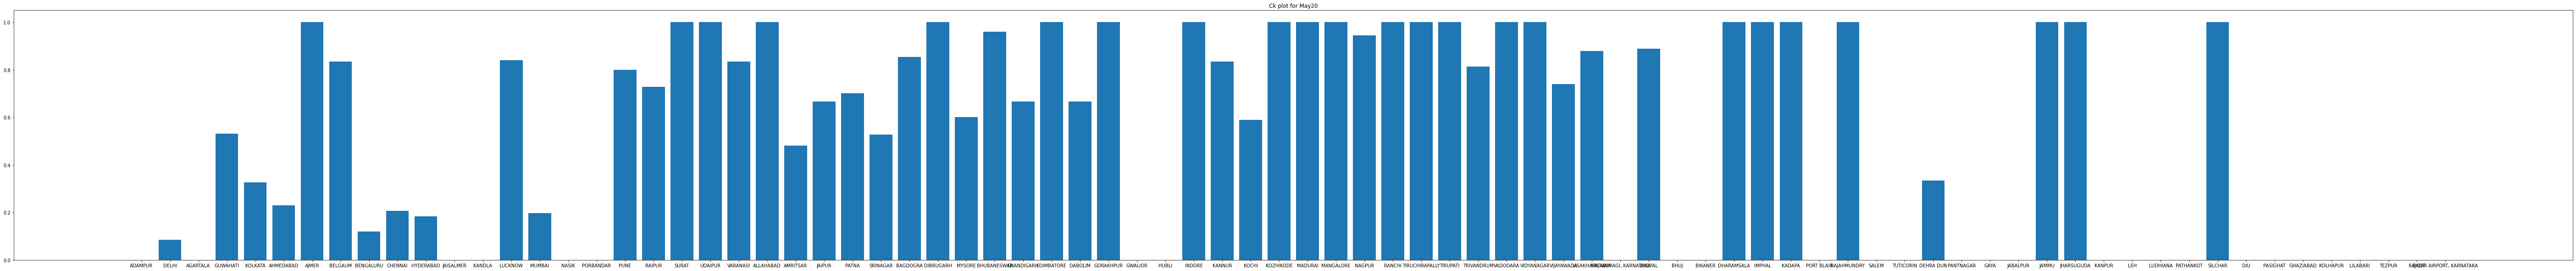

Average clustering coefficient for May20 is 0.5005764888525713


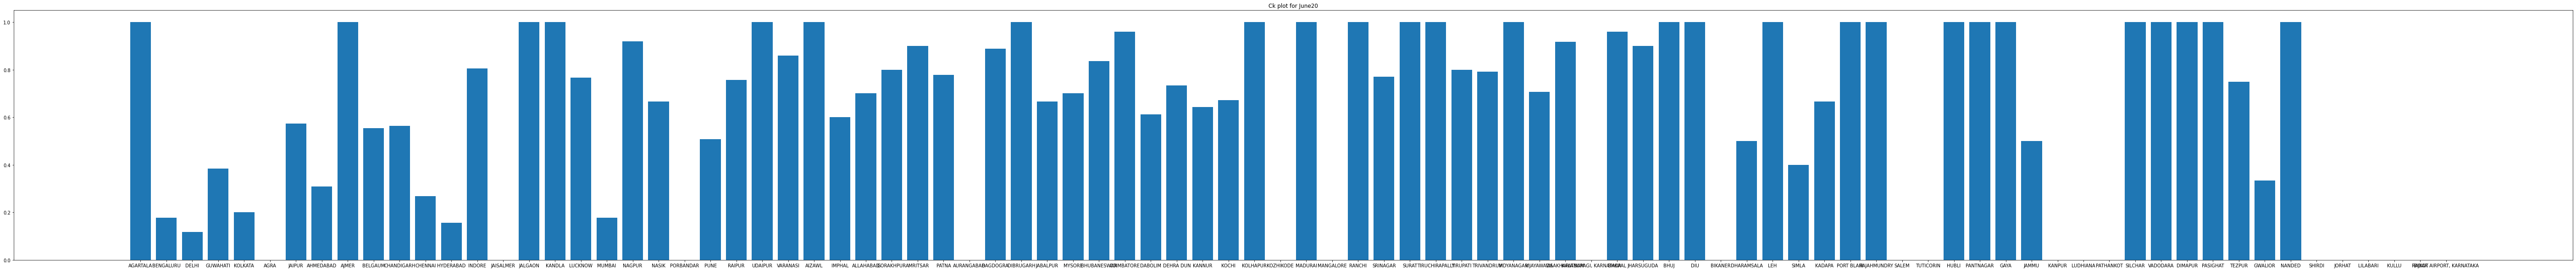

Average clustering coefficient for June20 is 0.6027726144275517


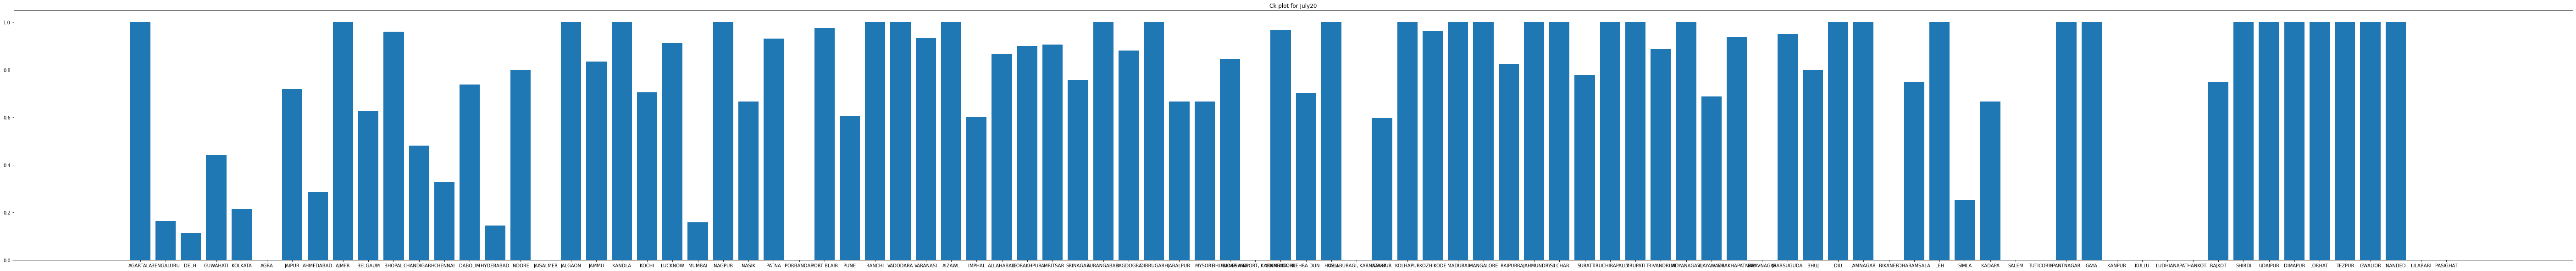

Average clustering coefficient for July20 is 0.677371907272084


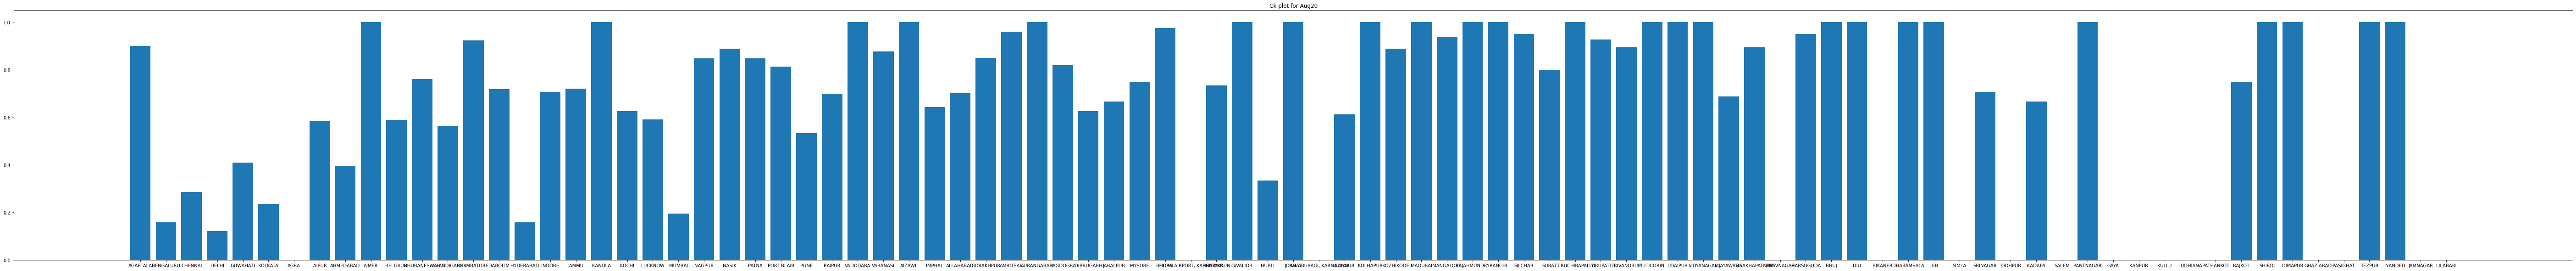

Average clustering coefficient for Aug20 is 0.635837175733831


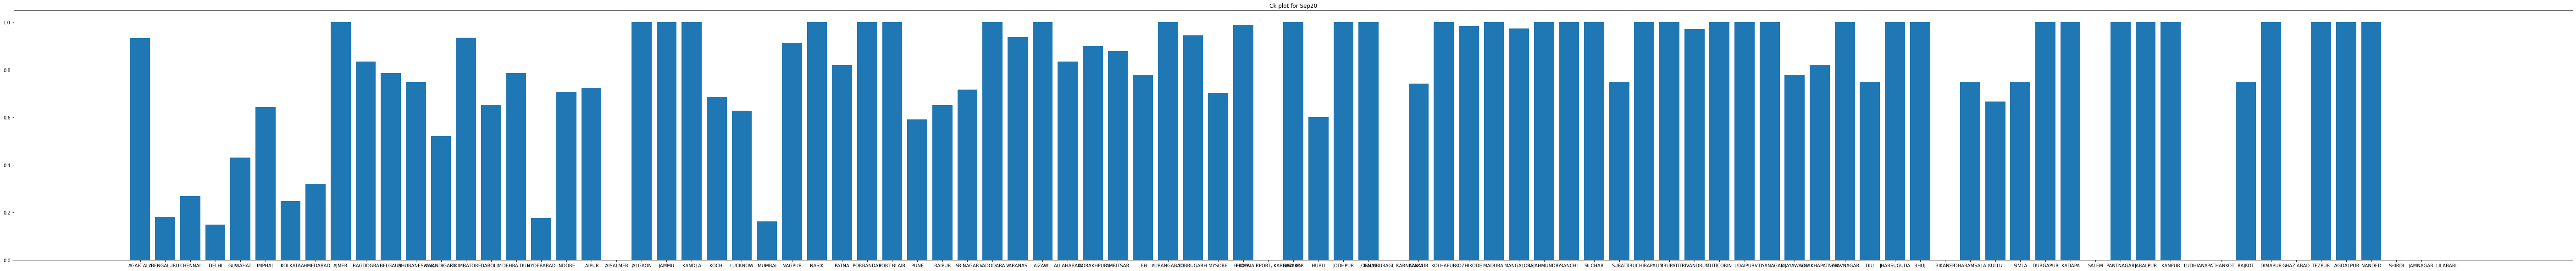

Average clustering coefficient for Sep20 is 0.7251840703446114


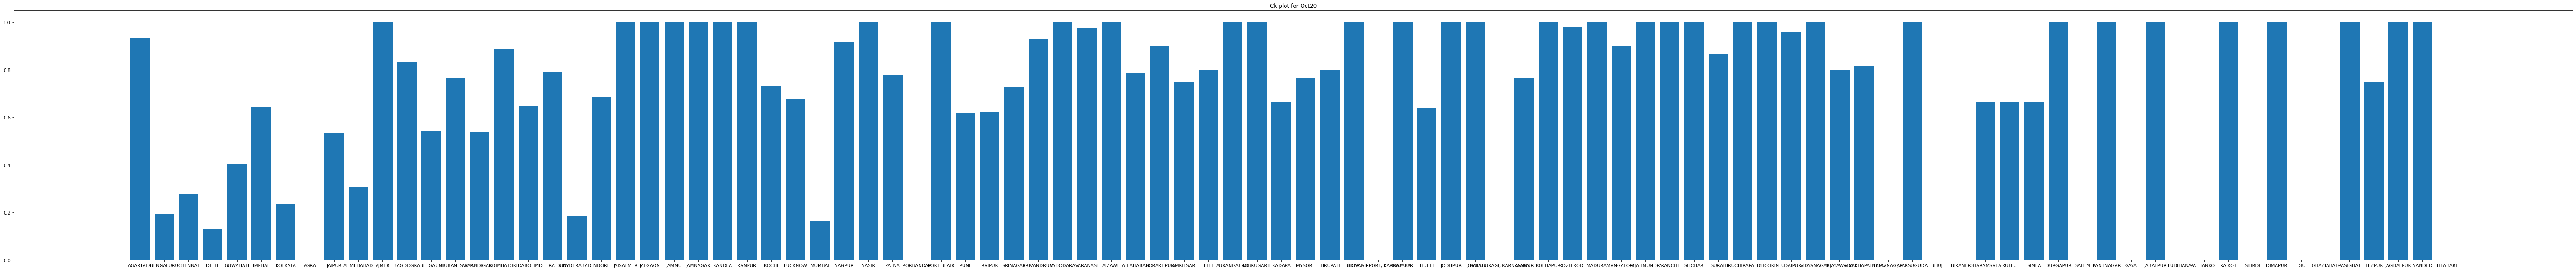

Average clustering coefficient for Oct20 is 0.6834669876143319


In [35]:
for i in range(len(graphs)):
    G = graphs[i]
    clust_coefficients = nx.clustering(G)
    
    plt.figure(figsize=(100, 10))
    plt.title("Ck plot for " + lbls1[i])
    plt.bar(*zip(*clust_coefficients.items()))
    plt.show()
    
    avg_clust_coeff = sum(clust_coefficients.values()) / len(clust_coefficients)
    print("Average clustering coefficient for", lbls1[i], "is", avg_clust_coeff)

    
    
    #TODO: fix labels and savefig 
    # didn't savefig so that pull request would be easier to show sir